In [ ]:
#Run in Qiime2-2023.2 environment

In [ ]:
!qiime feature-table filter-features \
    --i-table ../data/Metabolomics/animal/RPCA/filt_animal_feature_table.qza \
    --p-min-samples 47 \
    --o-filtered-table ../data/Metabolomics/animal/RPCA/gemelli_filtered.qza
#the min number of samples that a feature must be in to be retained [75% of 94 = 71, 50% of 94 = 47]

In [4]:
!qiime feature-table rename-ids \
    --i-table ../data/Metabolomics/animal/RPCA/gemelli_filtered.qza \
    --m-metadata-file ../data/Metabolomics/MSV000090940_gnps_metadata_fixed.tsv \
    --m-metadata-column qiita_sample_name \
    --o-renamed-table ../data/Metabolomics/animal/RPCA/gemelli_filt_qiita-renamed.qza

Saved FeatureTable[Frequency] to: ../data/Metabolomics/animal/RPCA/gemelli_filt_qiita-renamed.qza


In [ ]:
!qiime feature-table filter-features \
    --i-table ../data/Microbiome/pool_filtered/3000_filt_ft.qza \#poor sequencing removed already
    --p-min-frequency 820 \#the min feature frequencey (all samples), checked summary qzv [10xsample# = 10x82 = 820]
    --p-min-samples 41 \#the min number of samples that a feature must be in to be retained [75% of 82 = 66, 50% of 82 = 41]
    --o-filtered-table ../data/Microbiome/pool_filtered/RPCA/gemelli_filtered.qza

In [ ]:
!qiime feature-table filter-features \
    --i-table ../data/Microbiome/pool_filtered_other/poolfilt_other_ft.qza \
    --p-min-samples 41 \ #the min number of samples that a feature must be in to be retained [75% of 82 = 66, 50% of 82 = 41]
    --o-filtered-table ../data/Microbiome/pool_filtered_other/gemelli_filtered_otherft.qza

# Metagenomics - per genome and Metabolomics (2)

In [5]:
!qiime gemelli joint-rpca \
    --i-tables ../data/Microbiome/pool_filtered_pergenome/RPCA/gemelli_filtered.qza ../data/Metabolomics/animal/RPCA/gemelli_filt_qiita-renamed.qza \
    --m-sample-metadata-file ../data/Microbiome/14577_fixed.txt \
    --p-train-test-column  'train_test' \
    --p-max-iterations 15 \
    --p-min-feature-frequency 50 \
    --o-biplot ../data/Combined/MG-MB_joint_biplot.qza \
    --o-distance-matrix ../data/Combined/MG-MB_joint_distance_matrix.qza \
    --o-cross-validation-error ../data/Combined/MG-MB_cross_validation_error.qza
#min-sample-count = Minimum sum cutoff of sample across all features. The value can be at minimum zero and must be an whole integer. It is suggested to be greater than or equal to 500.
#min-feature-count = Minimum sum cutoff of features across all samples. The value can be at minimum zero and must be an whole integer.
#min-feature-frequency = Minimum percentage of samples a feature must appear with a value greater than zero. This value can range from 0 to 100 with decimal values allowed.

Saved PCoAResults % Properties('biplot') to: ../data/Combined/MG-MB_joint_biplot.qza
Saved DistanceMatrix to: ../data/Combined/MG-MB_joint_distance_matrix.qza
Saved SampleData[CrossValidationResults] to: ../data/Combined/MG-MB_cross_validation_error.qza


In [7]:
!qiime longitudinal volatility \
    --m-metadata-file ../data/Combined/MG-MB_cross_validation_error.qza \
    --p-state-column 'iteration' \
    --o-visualization ../data/Combined/MG-MB_cv-error_volatility_plot.qzv

Saved Visualization to: ../data/Combined/MG-MB_cv-error_volatility_plot.qzv


![image](../data/Combined/MG-MB_cv-error_volatility_plot.png)

In [11]:
!qiime emperor biplot \
    --i-biplot ../data/Combined/MG-MB_joint_biplot.qza \
    --m-sample-metadata-file ../data/Microbiome/14577_fixed.txt \
    --p-number-of-features 25 \
    --o-visualization ../data/Combined/MG-MB_emperor-biplot.qzv

Saved Visualization to: ../data/Combined/MG-MB_emperor-biplot.qzv


In [17]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Combined/MG-MB_joint_distance_matrix.qza \
    --m-metadata-file ../data/Microbiome/14577_fixed.txt \
    --m-metadata-column 'marmoset_id' \
    --p-pairwise True \
    --o-visualization ../data/Combined/MG-MB_permanova-marmid.qzv

Saved Visualization to: ../data/Combined/MG-MB_permanova-marmid.qzv


In [18]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Combined/MG-MB_joint_distance_matrix.qza \
    --m-metadata-file ../data/Microbiome/14577_fixed.txt \
    --m-metadata-column 'Pre_Post' \
    --o-visualization ../data/Combined/MG-MB_permanova-prepost.qzv
#significantly different p=0.014

Saved Visualization to: ../data/Combined/MG-MB_permanova-prepost.qzv


In [21]:
!qiime gemelli filter-ordination \
    --i-ordination ../data/Combined/MG-MB_joint_biplot.qza \
    --i-table ../data/Microbiome/pool_filtered_pergenome/RPCA/gemelli_filtered.qza \
    --o-subset-biplot ../data/Combined/MG-MB_shotgun_ordination.qza

!qiime gemelli filter-ordination \
    --i-ordination ../data/Combined/MG-MB_joint_biplot.qza \
    --i-table ../data/Metabolomics/animal/RPCA/gemelli_filt_qiita-renamed.qza \
    --o-subset-biplot ../data/Combined/MG-MB_metab_ordination.qza

Saved PCoAResults % Properties('biplot') to: ../data/Combined/MG-MB_shotgun_ordination.qza
Saved PCoAResults % Properties('biplot') to: ../data/Combined/MG-MB_metab_ordination.qza


In [28]:
!qiime qurro loading-plot \
    --i-ranks ../data/Combined/MG-MB_shotgun_ordination.qza \
    --i-table ../data/Microbiome/pool_filtered_pergenome/RPCA/gemelli_filtered.qza \
    --m-feature-metadata-file ../../shotgun_scripts/woltka_v2_taxonomy.qza \
    --m-sample-metadata-file ../data/Microbiome/14577_fixed.txt \
    --o-visualization ../data/Combined/MG-MB_shotgun_qurro.qzv

!qiime qurro loading-plot \
    --i-ranks ../data/Combined/MG-MB_metab_ordination.qza \
    --i-table ../data/Metabolomics/animal/RPCA/gemelli_filt_qiita-renamed.qza \
    --m-feature-metadata-file ../data/Metabolomics/metab-taxonomy.qza \
    --m-sample-metadata-file ../data/Microbiome/14577_fixed.txt \
    --o-visualization ../data/Combined/MG-MB_metab_qurro.qzv

Saved Visualization to: ../data/Combined/MG-MB_shotgun_qurro.qzv
Saved Visualization to: ../data/Combined/MG-MB_metab_qurro.qzv


In [23]:
!qiime gemelli feature-correlation-table \
    --i-ordination ../data/Combined/MG-MB_joint_biplot.qza \
    --o-correlation-table ../data/Combined/MG-MB_correlation_table.qza

Saved FeatureData[OrdinationCorrelation] to: ../data/Combined/MG-MB_correlation_table.qza


In [1]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
%matplotlib inline

In [ ]:
# export the correlations (Note: this step can take a few minutes)
correlation_table = q2.Artifact.load('../data/Combined/MG-MB_correlation_table.qza')
correlation_table_df = correlation_table.view(pd.DataFrame)

In [8]:
correlation_table_df = pd.read_csv('../data/Combined/correlation.csv', index_col=0, low_memory=False)

In [9]:
correlation_table_df.head()

81.52056115  82.53717869  84.04448664  86.0601131  86.0601519  \
featureid                                                                    
81.52056115     1.000000     0.999508    -0.989687    0.979720   -0.999651   
82.53717869     0.999508     1.000000    -0.986079    0.980491   -0.998685   
84.04448664    -0.989687    -0.986079     1.000000   -0.945421    0.993080   
86.0601131      0.979720     0.980491    -0.945421    1.000000   -0.974520   
86.0601519     -0.999651    -0.998685     0.993080   -0.974520    1.000000   

             86.09639834  86.09647416  86.09650262  86.0965062  87.04413041  \
featureid                                                                     
81.52056115     0.998192     0.997703    -0.998710   -0.998715     0.994999   
82.53717869     0.998578     0.998383    -0.999604   -0.996860     0.994602   
84.04448664    -0.979635    -0.977877     0.981434    0.995422    -0.974165   
86.0601131      0.989513     0.990059    -0.985132   -0.971628     0.994542   
86.0601519     -0.996268    -0.995566     0.997150    0.999587    -0.992444   

             ...  G902363555  G902363565  G902363595  G902363685  G902363725  \
featureid    ...                                                               
81.52056115  ...   -0.991304   -0.997167   -0.796990   -0.869951    0.980245   
82.53717869  ...   -0.990350   -0.996174   -0.781648   -0.871987    0.979063   
84.04448664  ...    0.969103    0.980910    0.798073    0.803024   -0.992595   
86.0601131   ...   -0.996276   -0.990736   -0.834574   -0.951037    0.920887   
86.0601519   ...    0.988351    0.995468    0.795894    0.857911   -0.984498   

             G902364485  G902385285  G902387315  G902501965  G902777695  
featureid                                                                
81.52056115   -0.985244    0.999860   -0.990600   -0.995284    0.997893  
82.53717869   -0.980547    0.999885   -0.987051   -0.995601    0.996046  
84.04448664    0.977541   -0.988213    0.980245    0.992092   -0.996889  
86.0601131    -0.980719    0.979661   -0.985418   -0.957763    0.966429  
86.0601519     0.984635   -0.999325    0.989657    0.996574   -0.999247  

[5 rows x 3660 columns]

In [10]:
correlation_table_df.shape

(3660, 3660)

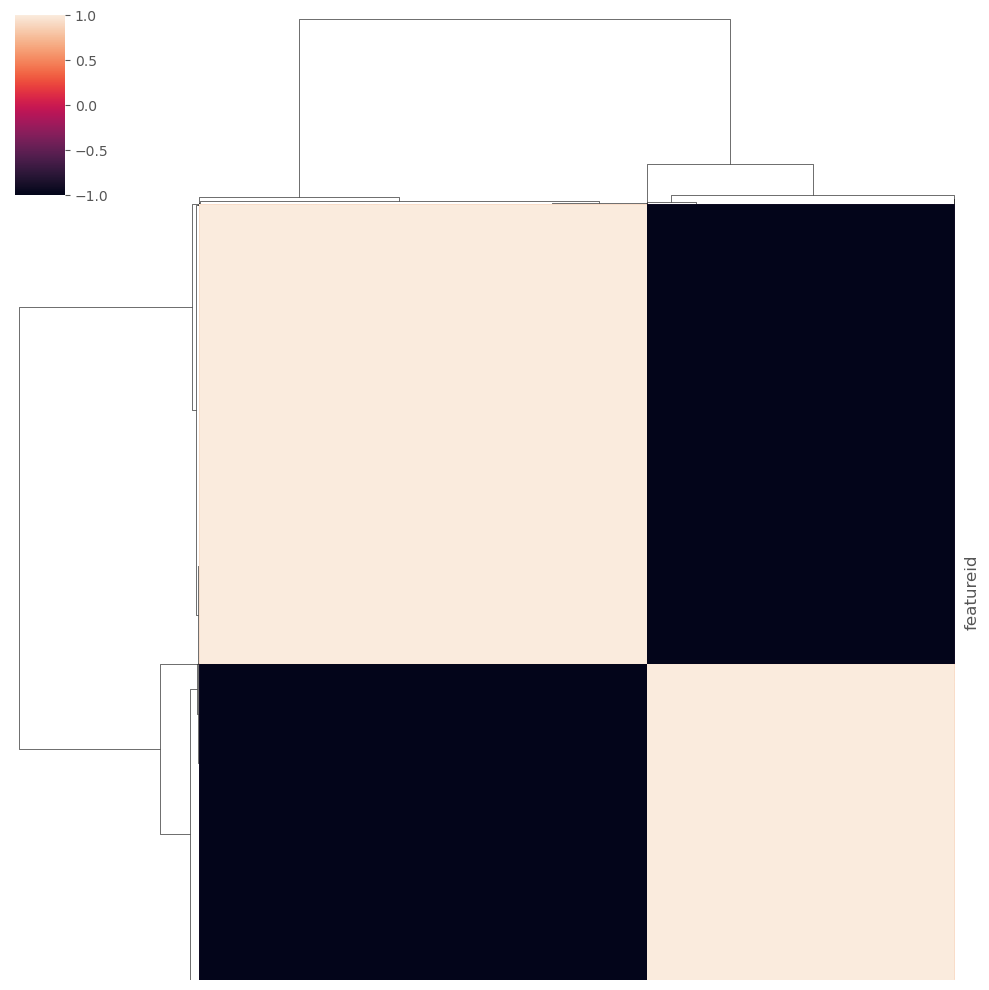

In [25]:
sns.clustermap(correlation_table_df,
               yticklabels=False,
               xticklabels=False)

plt.show()

In [11]:
correlation_table_df2 = correlation_table_df.filter(regex='^G([0-9]+)', axis=1)
correlation_table_df3 = correlation_table_df2.filter(regex='^[^G]', axis=0)
correlation_table_df3
#microbes in columns, metabolites in rows

G000006865  G000006925  G000007145  G000007325  G000007525  \
featureid                                                                 
81.52056115   -0.993086   -0.998934   -0.992675    0.984684   -0.898062   
82.53717869   -0.994955   -0.997061   -0.994805    0.979759   -0.889745   
84.04448664    0.966075    0.994433    0.965132   -0.999102    0.950995   
86.0601131    -0.993651   -0.974224   -0.993024    0.939099   -0.798914   
86.0601519     0.989649    0.999549    0.989173   -0.988686    0.909373   
...                 ...         ...         ...         ...         ...   
959.5209845    0.985347    0.994903    0.983940   -0.983606    0.889048   
1039.547347    0.993714    0.998350    0.993411   -0.983117    0.895781   
1069.558954   -0.825761   -0.903279   -0.823935    0.950885   -0.998865   
1171.83842    -0.984434   -0.999760   -0.983714    0.993404   -0.921398   
1177.886656   -0.457741   -0.583124   -0.451637    0.676107   -0.784100   

             G000007785  G000008865  G000009925  G000010425  G000011065  ...  \
featureid                                                                ...   
81.52056115    0.990173   -0.998954    0.985906   -0.966594    0.985955  ...   
82.53717869    0.990809   -0.997091    0.984844   -0.961623    0.984648  ...   
84.04448664   -0.962476    0.994372   -0.994696    0.992781   -0.995382  ...   
86.0601131     0.998067   -0.974351    0.932528   -0.899550    0.932528  ...   
86.0601519    -0.986357    0.999554   -0.989443    0.973029   -0.989581  ...   
...                 ...         ...         ...         ...         ...  ...   
959.5209845   -0.989499    0.994929   -0.968364    0.957705   -0.969253  ...   
1039.547347   -0.990212    0.998373   -0.986001    0.965272   -0.985951  ...   
1069.558954    0.818868   -0.903032    0.938344   -0.974753    0.940226  ...   
1171.83842     0.981882   -0.999748    0.990838   -0.979311    0.991223  ...   
1177.886656    0.475723   -0.582760    0.595561   -0.696660    0.601446  ...   

             G902363555  G902363565  G902363595  G902363685  G902363725  \
featureid                                                                 
81.52056115   -0.991304   -0.997167   -0.796990   -0.869951    0.980245   
82.53717869   -0.990350   -0.996174   -0.781648   -0.871987    0.979063   
84.04448664    0.969103    0.980910    0.798073    0.803024   -0.992595   
86.0601131    -0.996276   -0.990736   -0.834574   -0.951037    0.920887   
86.0601519     0.988351    0.995468    0.795894    0.857911   -0.984498   
...                 ...         ...         ...         ...         ...   
959.5209845    0.995121    0.996859    0.863727    0.891804   -0.960902   
1039.547347    0.990733    0.996718    0.790210    0.869684   -0.980364   
1069.558954   -0.836510   -0.862382   -0.716172   -0.574623    0.945235   
1171.83842    -0.985656   -0.993566   -0.805965   -0.847469    0.986437   
1177.886656   -0.517888   -0.536965   -0.716996   -0.283998    0.603505   

             G902364485  G902385285  G902387315  G902501965  G902777695  
featureid                                                                
81.52056115   -0.985244    0.999860   -0.990600   -0.995284    0.997893  
82.53717869   -0.980547    0.999885   -0.987051   -0.995601    0.996046  
84.04448664    0.977541   -0.988213    0.980245    0.992092   -0.996889  
86.0601131    -0.980719    0.979661   -0.985418   -0.957763    0.966429  
86.0601519     0.984635   -0.999325    0.989657    0.996574   -0.999247  
...                 ...         ...         ...         ...         ...  
959.5209845    0.998663   -0.990847    0.999739    0.978799   -0.991252  
1039.547347    0.983271   -0.999991    0.989100    0.995745   -0.997402  
1069.558954   -0.875388    0.882294   -0.872885   -0.907693    0.914431  
1171.83842    -0.986334    0.997336   -0.990238   -0.995487    0.999893  
1177.886656   -0.616180    0.532586   -0.592565   -0.546470    0.590971  

[3071 rows x 589 columns]

In [12]:
correlation_table_df3.describe()

G000006865   G000006925   G000007145   G000007325   G000007525  \
count  3071.000000  3071.000000  3071.000000  3071.000000  3071.000000   
mean      0.004876     0.004669     0.004840    -0.004396     0.002960   
std       0.976916     0.980211     0.976546     0.964606     0.877187   
min      -0.999987    -0.999995    -0.999981    -0.999984    -0.998865   
25%      -0.993108    -0.997249    -0.992682    -0.981640    -0.892442   
50%       0.150159     0.213401     0.155624    -0.205720     0.134400   
75%       0.993729     0.997656     0.993371     0.981675     0.890670   
max       0.999990     0.999997     0.999944     0.999928     0.996237   

        G000007785   G000008865   G000009925   G000010425   G000011065  ...  \
count  3071.000000  3071.000000  3071.000000  3071.000000  3071.000000  ...   
mean     -0.005182     0.004671    -0.003785     0.003763    -0.003810  ...   
std       0.974419     0.980239     0.965760     0.945706     0.965772  ...   
min      -0.999617    -0.999997    -0.999911    -0.998137    -0.999942  ...   
25%      -0.991201    -0.997282    -0.982072    -0.962763    -0.982134  ...   
50%      -0.165660     0.212892    -0.206513     0.220148    -0.201088  ...   
75%       0.990463     0.997691     0.982138     0.961823     0.982231  ...   
max       0.999973     0.999995     0.999840     0.999941     0.999732  ...   

        G902363555   G902363565   G902363595   G902363685   G902363725  \
count  3071.000000  3071.000000  3071.000000  3071.000000  3071.000000   
mean      0.005286     0.005030     0.006688     0.006279    -0.003616   
std       0.975043     0.979905     0.787385     0.863938     0.959865   
min      -0.999997    -0.999982    -0.995412    -0.995463    -0.999361   
25%      -0.991142    -0.996442    -0.795188    -0.874161    -0.976003   
50%       0.180898     0.183399     0.131911     0.145026    -0.192581   
75%       0.991948     0.997031     0.798569     0.876578     0.976054   
max       0.999995     0.999993     0.997186     0.999817     0.999869   

        G902364485   G902385285   G902387315   G902501965   G902777695  
count  3071.000000  3071.000000  3071.000000  3071.000000  3071.000000  
mean      0.005420    -0.004582     0.005306     0.004086    -0.004489  
std       0.967937     0.981701     0.973245     0.976108     0.978743  
min      -0.999611    -0.999999    -0.999974    -0.999943    -0.999982  
25%      -0.983562    -0.998930    -0.989174    -0.992495    -0.995978  
50%       0.193960    -0.208694     0.199709     0.226517    -0.228042  
75%       0.984885     0.998642     0.990232     0.993001     0.995977  
max       0.999676     1.000000     0.999975     0.999993     0.999981  

[8 rows x 589 columns]

In [13]:
correlation_table_df3.T.describe()

featureid  81.52056115  82.53717869  84.04448664  86.0601131  86.0601519  \
count       589.000000   589.000000   589.000000  589.000000  589.000000   
mean          0.099815     0.099751    -0.098514    0.098381   -0.099720   
std           0.945021     0.944450     0.936215    0.927721    0.944757   
min          -0.999984    -0.999893    -0.999602   -0.998860   -1.000000   
25%          -0.993911    -0.993134    -0.988893   -0.974236   -0.990741   
50%           0.812807     0.813815    -0.743136    0.800818   -0.799553   
75%           0.989062     0.987220     0.980441    0.958187    0.993222   
max           0.999928     0.999946     0.998987    0.999994    0.999901   

featureid  86.09639834  86.09647416  86.09650262  86.0965062  87.04413041  \
count       589.000000   589.000000   589.000000  589.000000   589.000000   
mean          0.099787     0.099744    -0.099743   -0.099627     0.099625   
std           0.943394     0.942927     0.943710    0.943999     0.940808   
min          -0.999899    -0.999887    -0.999981   -0.999963    -0.999934   
25%          -0.992922    -0.992366    -0.984567   -0.991499    -0.990007   
50%           0.826315     0.828593    -0.812928   -0.794428     0.840838   
75%           0.984077     0.983009     0.992712    0.991534     0.978528   
max           0.999977     0.999993     0.999990    0.999989     0.999974   

featureid  ...  922.7338987  923.4997839  930.5427185  943.5265518  \
count      ...   589.000000   589.000000   589.000000   589.000000   
mean       ...    -0.099860    -0.099700    -0.099556     0.073817   
std        ...     0.944837     0.944360     0.944016     0.719076   
min        ...    -0.999981    -0.999953    -0.999901    -0.933538   
25%        ...    -0.986937    -0.988450    -0.991995    -0.727051   
50%        ...    -0.814884    -0.806424    -0.784286     0.457938   
75%        ...     0.994063     0.992685     0.991452     0.778412   
max        ...     0.999999     0.999996     0.999935     0.914204   

featureid  945.5065198  959.5209845  1039.547347  1069.558954  1171.83842  \
count       589.000000   589.000000   589.000000   589.000000  589.000000   
mean         -0.099856    -0.099367    -0.099794     0.087502    0.099549   
std           0.944549     0.938814     0.944903     0.846571    0.943542   
min          -0.999997    -0.999835    -0.999991    -0.998865   -0.999958   
25%          -0.986504    -0.978285    -0.988563    -0.866166   -0.991084   
50%          -0.811352    -0.815297    -0.812149     0.581298    0.788391   
75%           0.993812     0.984776     0.993650     0.909211    0.991223   
max           0.999997     0.999940     0.999976     0.992727    0.999986   

featureid  1177.886656  
count       589.000000  
mean          0.053970  
std           0.533969  
min          -0.784100  
25%          -0.526171  
50%           0.294035  
75%           0.580853  
max           0.804738  

[8 rows x 3071 columns]

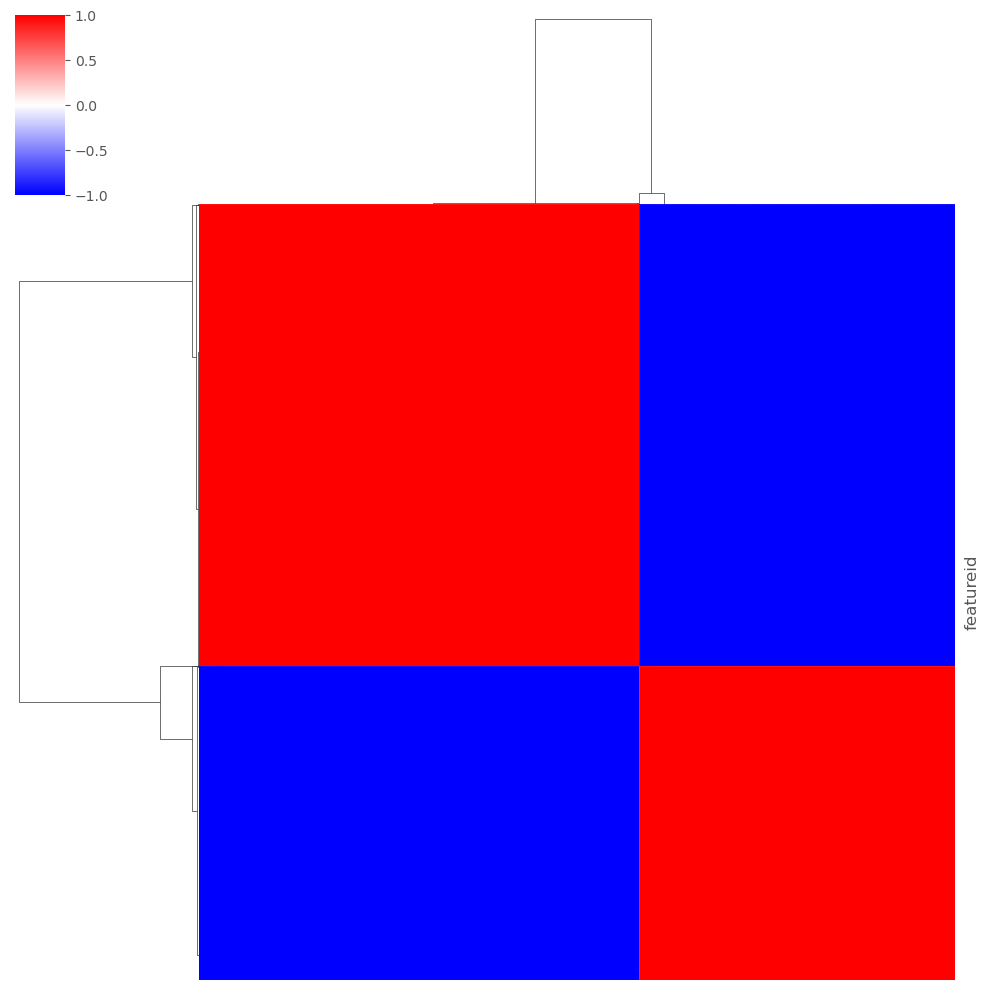

In [40]:
sns.clustermap(correlation_table_df3,
               yticklabels=False,
               xticklabels=False, 
               cmap='bwr')

plt.show()

In [14]:
glist1 = pd.read_csv('../data/Combined/MG-MB_qurro/gPhocaeicola-Bacteroides_gAkkermansia-Bifidobacterium.tsv',
                    sep='\t', usecols=["Feature ID"])
glist2 = pd.read_csv('../data/Combined/MG-MB_qurro/gPhocaeicola_gAkkermansia-gPrevotella.tsv',
                    sep='\t', usecols=["Feature ID"])
glist3 = ['G000006925','G000008865','G000012005','G000026325','G000026345',
          'G000299455','G000777575','G000777875','G000779535','G000944855',
          'G001283625','G007998125','G008273775','G012161415','G012357415',
          'G008698165','G001417815','G000741785','G000741175']
glist4 = pd.read_csv('../data/Combined/MG-MB_qurro/Ax3topbot_gEscherichia_gBifidobacterium-CAG-267.tsv',
                    sep='\t', usecols=["Feature ID"])
glist5 = pd.read_csv('../data/Combined/MG-MB_qurro/Phocaeicola-vulgatus_Prevotella-copri.tsv',
                    sep='\t', usecols=["Feature ID"])

In [15]:
glists = set(glist1["Feature ID"].values).union(set(glist2["Feature ID"].values), 
                                              set(glist3), set(glist4["Feature ID"].values),
                                             set(glist5["Feature ID"].values))

In [16]:
glists

{'G000006925',
 'G000007525',
 'G000008865',
 'G000009925',
 'G000010425',
 'G000011065',
 'G000012005',
 'G000012825',
 'G000020225',
 'G000022965',
 'G000025205',
 'G000025925',
 'G000026325',
 'G000026345',
 'G000144405',
 'G000146675',
 'G000154205',
 'G000154525',
 'G000154845',
 'G000157915',
 'G000157935',
 'G000159075',
 'G000159155',
 'G000160535',
 'G000165905',
 'G000177075',
 'G000179055',
 'G000183345',
 'G000185845',
 'G000187895',
 'G000190575',
 'G000191065',
 'G000195635',
 'G000218235',
 'G000220255',
 'G000235885',
 'G000242335',
 'G000262545',
 'G000299455',
 'G000304215',
 'G000315485',
 'G000347695',
 'G000374585',
 'G000378745',
 'G000379965',
 'G000381365',
 'G000426565',
 'G000426585',
 'G000430525',
 'G000431915',
 'G000431935',
 'G000433375',
 'G000433575',
 'G000434095',
 'G000434135',
 'G000434515',
 'G000434735',
 'G000434975',
 'G000435635',
 'G000436035',
 'G000436055',
 'G000436135',
 'G000436435',
 'G000436695',
 'G000436795',
 'G000436855',
 'G0004369

In [17]:
len(glists)

166

In [18]:
microbes_list = glists.intersection(set(correlation_table_df3.columns))
len(microbes_list)

164

In [11]:
correlation_table_df4 = correlation_table_df3.filter(items=microbes_list, axis=1)
#filter for microbes of interest

In [101]:
keymetab_list=['3711','9460','8063','8943','8457','9184','8530','9170','744','5272',
               '5767','5267','3674','5768','4175','2227','3511','1362','2646',
              '5739', '6302', '6445', '6503', '6654', '7259', '1328']
correlation_table_df5 = correlation_table_df4.filter(items=keymetab_list, axis=0)
#filter for metabolites of interest

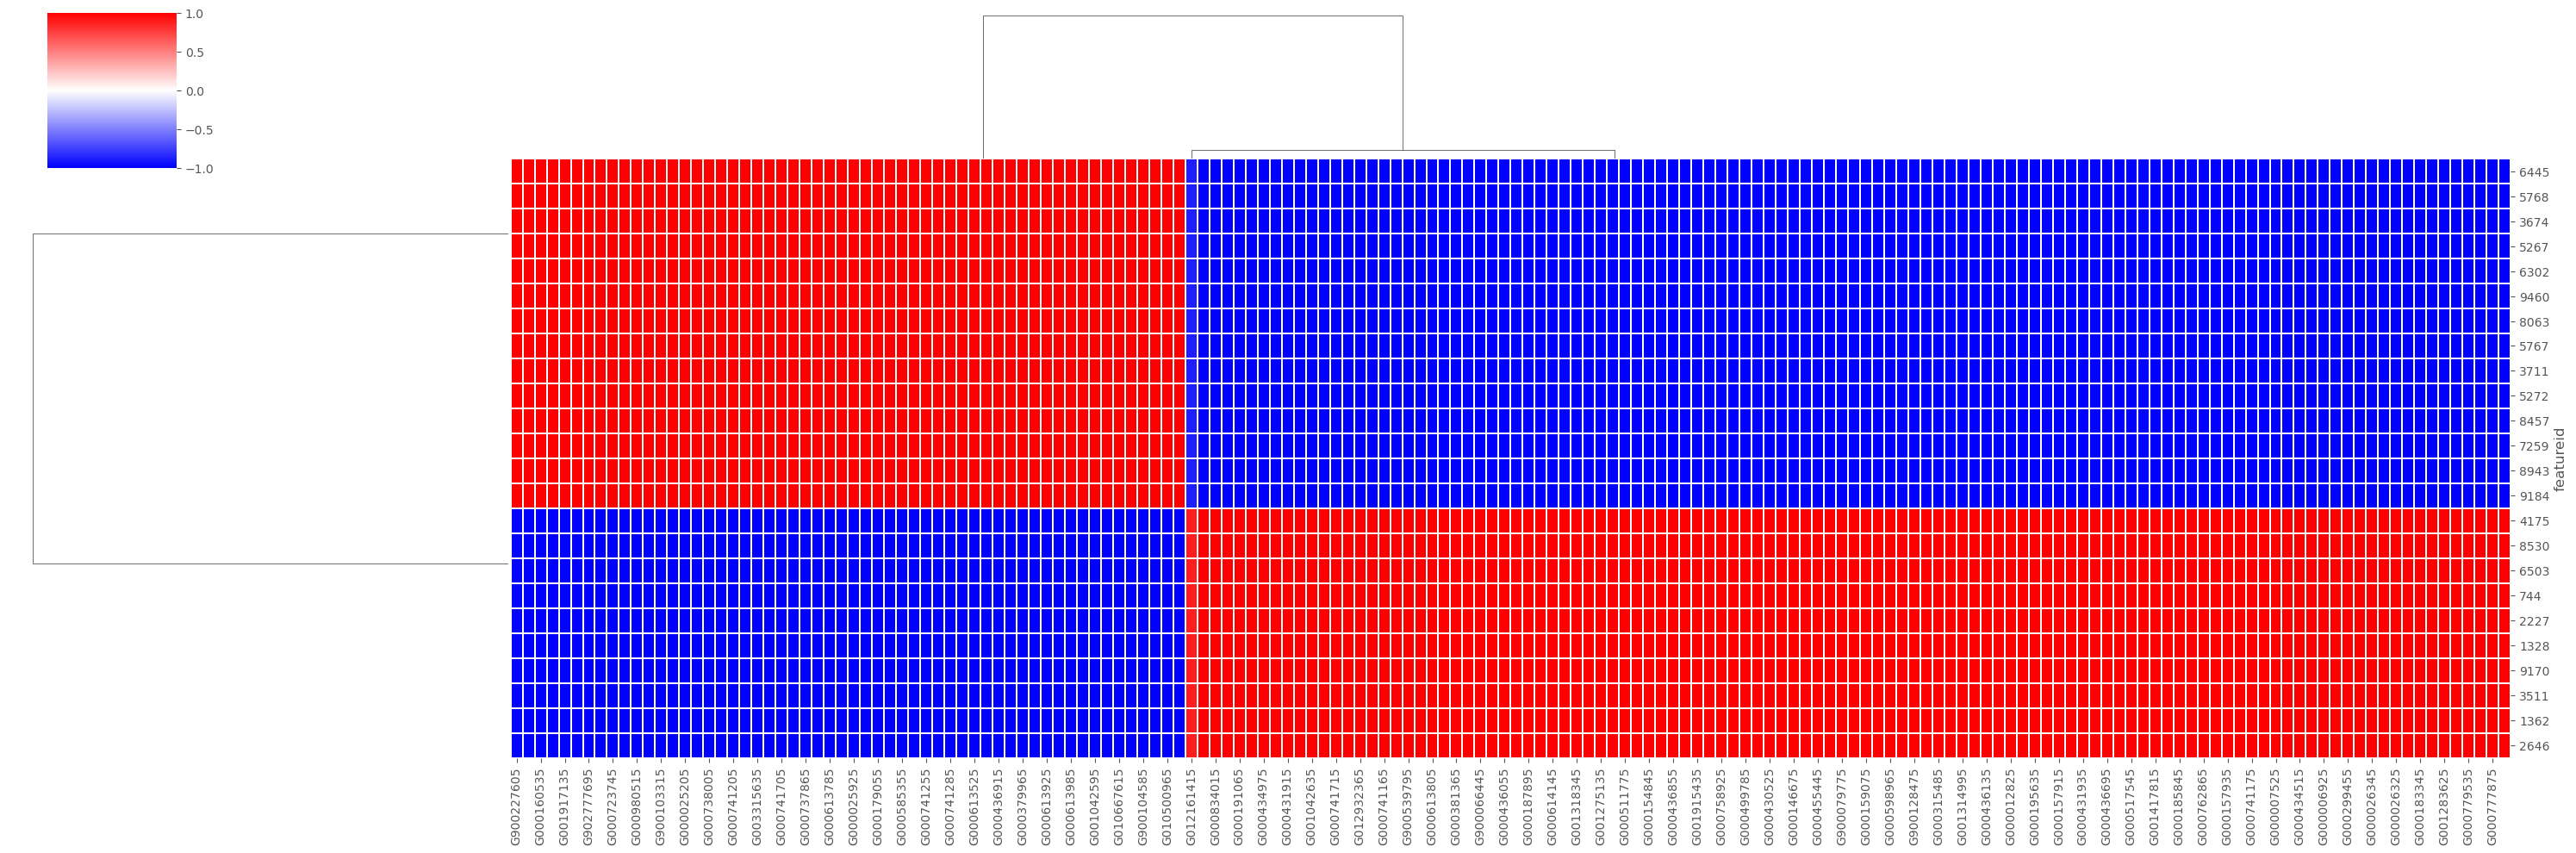

In [102]:
sns.clustermap(correlation_table_df5, figsize=(30, 10),
               cmap='bwr', linewidths=0.1)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/jointRPCA_corr_clustermap_all.svg', dpi=150, bbox_inches='tight')
plt.show()

In [72]:
import matplotlib as mpl

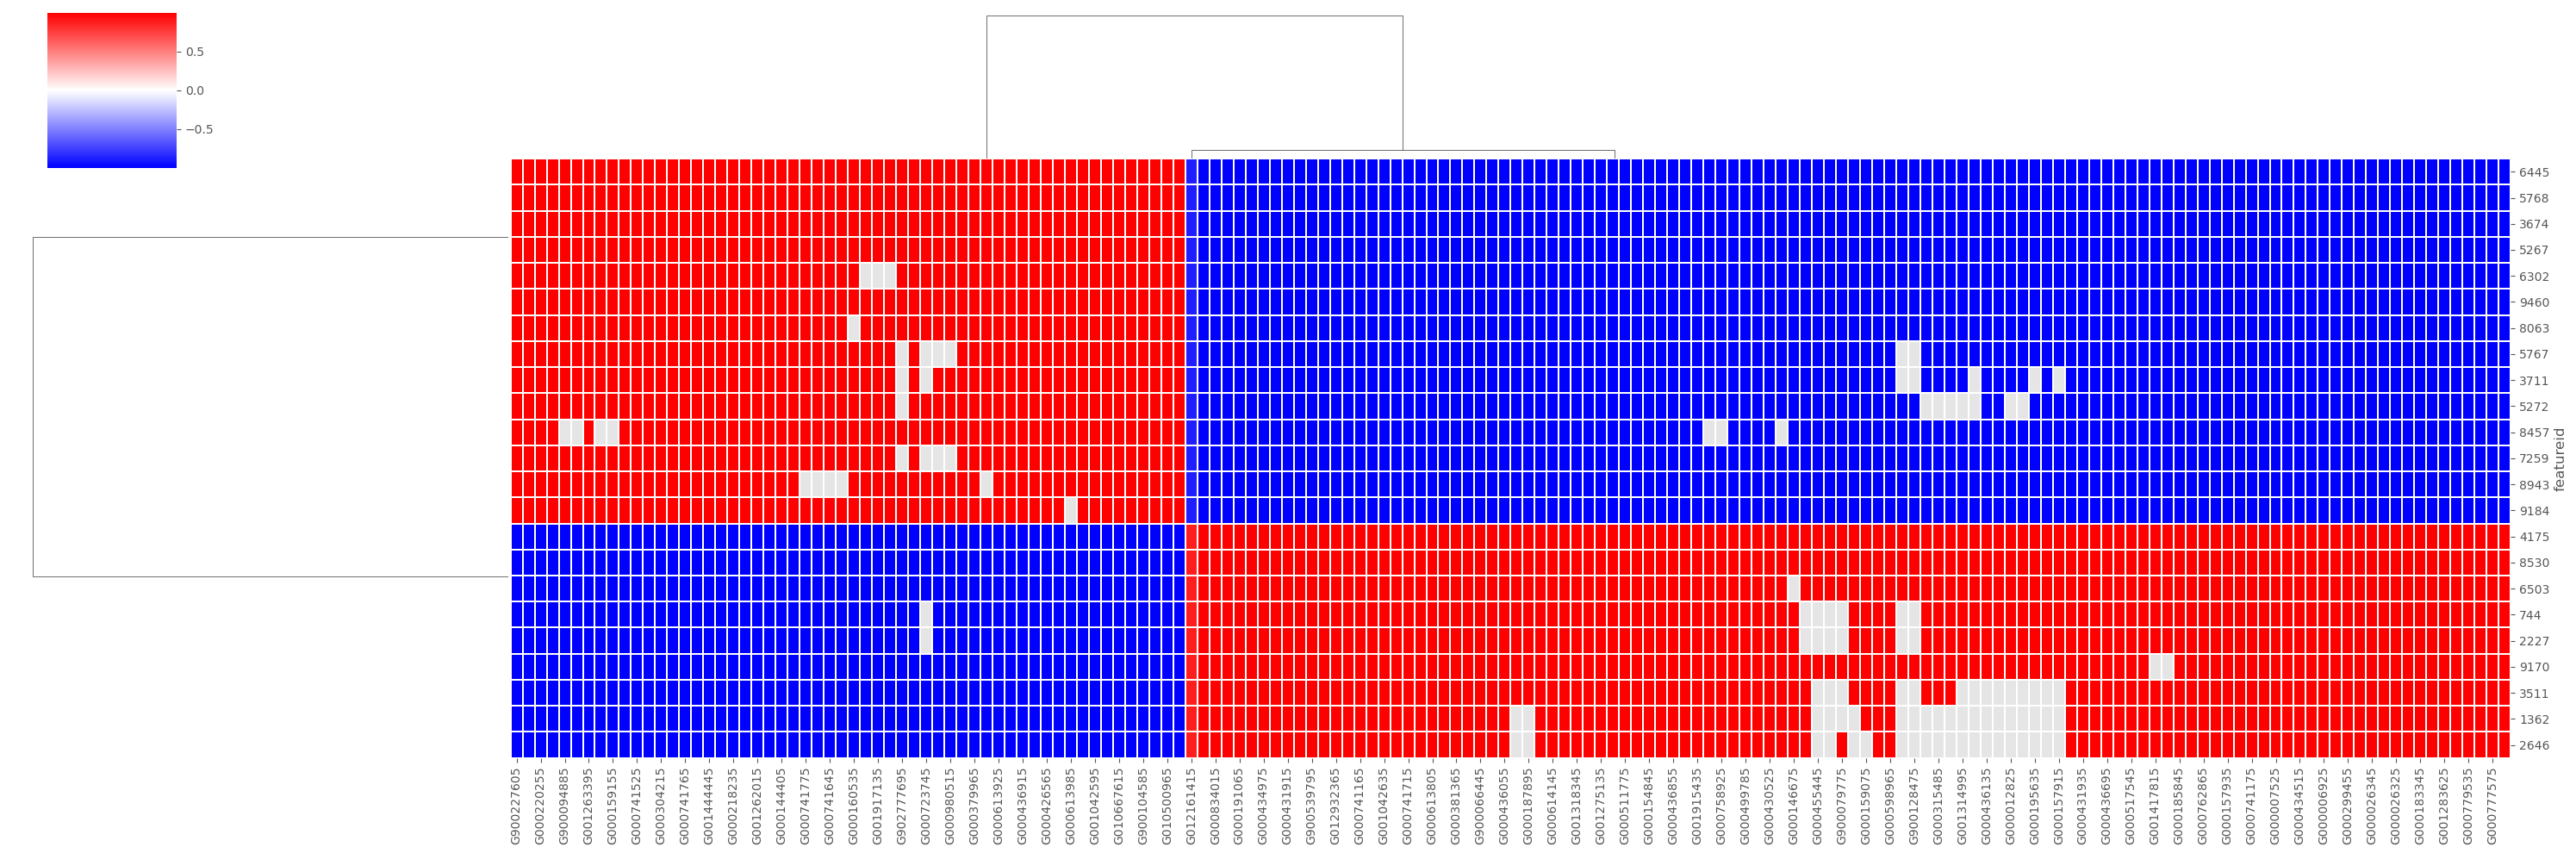

In [79]:
mask = np.where(np.logical_or(correlation_table_df5 >= 0.9999999, correlation_table_df5 <= -0.99999999), 
                True, False)

cmap = mpl.cm.get_cmap('bwr')
cmap.set_bad("black")

sns.clustermap(correlation_table_df5, figsize=(30, 10),
               cmap='bwr', linewidths=0.1, mask=mask)

plt.show()

In [13]:
metab_table = q2.Artifact.load('../data/Metabolomics/animal/RPCA/gemelli_filt_qiita-renamed.qza')
metab_table_df = metab_table.view(pd.DataFrame)
metab_table_df.head()

56        257        1104         1036        3835  \
14577.GK.TP7  3505827.5  2899459.8   48627.100   56243.0100   1671.1060   
14577.BT.TP3  1440172.1  2807688.0  147038.470  133449.9200  10127.6810   
14577.MA.TP7  3677318.8  2124542.8   40908.832   38562.1900   5171.5244   
14577.BA.TP7        0.0   913762.1   70100.555    4053.6477    721.1892   
14577.EM.TP7        0.0   778347.0  125620.740   38593.5700  42750.0900   

                     322       2771       1896        1030         388  ...  \
14577.GK.TP7   270249.30  5693287.0  119226.54   60552.960   403576.12  ...   
14577.BT.TP3  3084179.00  5774501.0  335901.90  198387.860  1560695.00  ...   
14577.MA.TP7   251199.72  6435353.5  184476.52   31499.062   337100.53  ...   
14577.BA.TP7    81485.28  3870247.2  348497.12       0.000        0.00  ...   
14577.EM.TP7  3959161.20  3883092.0  452784.94   30224.395  2154575.50  ...   

                    8610        7281        7744        7293        7163  \
14577.GK.TP7  27584.1970  33691.0900   9590.0320  10244.7430  106297.980   
14577.BT.TP3  22839.8950   6792.5615  16113.3180      0.0000   21100.290   
14577.MA.TP7  30328.9730  60949.4900  13030.2130  17234.0720  190438.840   
14577.BA.TP7   1580.2214   7785.9290      0.0000   1616.3193   25310.604   
14577.EM.TP7      0.0000   1298.4990   3429.4707      0.0000       0.000   

                   6223       7607        7499  8190        8511  
14577.GK.TP7  8055.8520   9331.334  36747.3300   0.0  223436.770  
14577.BT.TP3  3720.6582      0.000   9943.7260   0.0  467084.120  
14577.MA.TP7  8591.6980  13038.730  52213.5660   0.0  251501.970  
14577.BA.TP7  2733.5140      0.000   1229.2261   0.0   48837.977  
14577.EM.TP7     0.0000      0.000      0.0000   0.0   75336.370  

[5 rows x 2619 columns]

In [103]:
keymetab_table = metab_table_df.filter(items=keymetab_list, axis=1)
keymetab_table.shape

(78, 24)

In [104]:
metadata = pd.read_csv('../data/Microbiome/14577_fixed.txt', sep='\t', index_col=0)
metadata.head()

Pre_Post collection_timepoint   keep collection_timestamp  \
sample_name                                                               
14577.AB.TP1       Pre                  Pre   True   6/2/202112:00:00PM   
14577.AB.TP10     Post                 LTFU  False  4/14/202212:00:00PM   
14577.AB.TP11     Post                 LTFU  False  7/11/202212:00:00PM   
14577.AB.TP2       Pre                  Pre   True   6/3/202112:00:00PM   
14577.AB.TP3       Pre                  Pre   True   6/8/202112:00:00PM   

              date_collected  description          diet  elevation  \
sample_name                                                          
14577.AB.TP1          6/2/21          NaN  gelandpellet        193   
14577.AB.TP10        4/14/22          NaN           gel        193   
14577.AB.TP11        7/11/22          NaN           gel        193   
14577.AB.TP2          6/3/21          NaN  gelandpellet        193   
14577.AB.TP3          6/8/21          NaN  gelandpellet        193   

              elevation_units           empo_1  ...             sex  \
sample_name                                     ...                   
14577.AB.TP1           meters  Host-associated  ...  not applicable   
14577.AB.TP10          meters  Host-associated  ...  not applicable   
14577.AB.TP11          meters  Host-associated  ...  not applicable   
14577.AB.TP2           meters  Host-associated  ...  not applicable   
14577.AB.TP3           meters  Host-associated  ...  not applicable   

              sex_of_pair         site taxon_id              time_collected  \
sample_name                                                                   
14577.AB.TP1           MF  EliottField  1441288  lights on to noon(ZT0-ZT6)   
14577.AB.TP10          MF  EliottField  1441288  lights on to noon(ZT0-ZT6)   
14577.AB.TP11          MF  EliottField  1441288  lights on to noon(ZT0-ZT6)   
14577.AB.TP2           MF  EliottField  1441288  lights on to noon(ZT0-ZT6)   
14577.AB.TP3           MF  EliottField  1441288  lights on to noon(ZT0-ZT6)   

              timepoint_group                                  title  \
sample_name                                                            
14577.AB.TP1              TP1  MarmosetDietChange-ACPResidentProject   
14577.AB.TP10            TP10  MarmosetDietChange-ACPResidentProject   
14577.AB.TP11            TP11  MarmosetDietChange-ACPResidentProject   
14577.AB.TP2              TP2  MarmosetDietChange-ACPResidentProject   
14577.AB.TP3              TP3  MarmosetDietChange-ACPResidentProject   

                 tube_id timepoint_number train_test  
sample_name                                           
14577.AB.TP1   363243238                1       test  
14577.AB.TP10  363243336               10      train  
14577.AB.TP11  363243344               11      train  
14577.AB.TP2   363243257                2      train  
14577.AB.TP3   363243266                3      train  

[5 rows x 55 columns]

In [105]:
keymetab_df = pd.merge(metadata[['collection_timepoint']], keymetab_table, left_index=True, right_index=True)
keymetab_df.head()

collection_timepoint        3711       9460        8063  \
14577.EM.TP1                   Pre   359.03125  5988.1826  13046.8940   
14577.EM.TP10                 LTFU     0.00000     0.0000   6933.9250   
14577.EM.TP11                 LTFU   704.23846   364.5301  16546.3120   
14577.EM.TP2                   Pre  1221.58300  1589.5860   1699.6844   
14577.EM.TP3                   Pre   224.98819  1746.7917   7889.6143   

                     8943       8457        9184       8530        9170  \
14577.EM.TP1   109125.470  30179.969  515225.620  64173.580  696935.800   
14577.EM.TP10   19050.170      0.000   20222.564      0.000   28202.828   
14577.EM.TP11   18742.654   3994.833   15748.263   8704.203   15180.492   
14577.EM.TP2    71494.530  19460.090   41577.910  32541.320   93195.750   
14577.EM.TP3    59250.070  24084.562   58099.500  31266.666  107069.780   

                      744  ...        4175        2227        3511  \
14577.EM.TP1    1750276.2  ...  84508.0160    985297.1  23928330.0   
14577.EM.TP10  37127964.0  ...   8823.9720  21392564.0  52045060.0   
14577.EM.TP11  22501236.0  ...   5296.4136  12187958.0  44101100.0   
14577.EM.TP2    8125440.0  ...  26656.0250   4020001.8  18737842.0   
14577.EM.TP3   14546212.0  ...  81266.0500   6415627.5  17853708.0   

                     1362        2646         6302         6445        6503  \
14577.EM.TP1   37573924.0  85240410.0   56125.1900   90719.0600  309232.900   
14577.EM.TP10  13172997.0  11133497.0    1036.2341    7368.4595   28819.324   
14577.EM.TP11   5457384.5   4342953.0       0.0000    2651.0370   18100.162   
14577.EM.TP2   15842310.0  15254164.0  162470.9800  185512.8400  731140.750   
14577.EM.TP3   13582810.0  25216552.0   23065.8520   89161.5900  382003.800   

                    7259        1328  
14577.EM.TP1   55147.418   3162979.0  
14577.EM.TP10      0.000  10510665.0  
14577.EM.TP11      0.000  23766258.0  
14577.EM.TP2   66995.875   1900736.2  
14577.EM.TP3   21876.912   2766572.5  

[5 rows x 25 columns]

In [106]:
keymetab_df2 = keymetab_df.set_index('collection_timepoint')
keymetab_df2.head()

3711       9460        8063        8943  \
collection_timepoint                                                  
Pre                    359.03125  5988.1826  13046.8940  109125.470   
LTFU                     0.00000     0.0000   6933.9250   19050.170   
LTFU                   704.23846   364.5301  16546.3120   18742.654   
Pre                   1221.58300  1589.5860   1699.6844   71494.530   
Pre                    224.98819  1746.7917   7889.6143   59250.070   

                           8457        9184       8530        9170  \
collection_timepoint                                                 
Pre                   30179.969  515225.620  64173.580  696935.800   
LTFU                      0.000   20222.564      0.000   28202.828   
LTFU                   3994.833   15748.263   8704.203   15180.492   
Pre                   19460.090   41577.910  32541.320   93195.750   
Pre                   24084.562   58099.500  31266.666  107069.780   

                             744        5272  ...        4175        2227  \
collection_timepoint                          ...                           
Pre                    1750276.2  68806.4400  ...  84508.0160    985297.1   
LTFU                  37127964.0      0.0000  ...   8823.9720  21392564.0   
LTFU                  22501236.0      0.0000  ...   5296.4136  12187958.0   
Pre                    8125440.0   2697.1858  ...  26656.0250   4020001.8   
Pre                   14546212.0  17436.5820  ...  81266.0500   6415627.5   

                            3511        1362        2646         6302  \
collection_timepoint                                                    
Pre                   23928330.0  37573924.0  85240410.0   56125.1900   
LTFU                  52045060.0  13172997.0  11133497.0    1036.2341   
LTFU                  44101100.0   5457384.5   4342953.0       0.0000   
Pre                   18737842.0  15842310.0  15254164.0  162470.9800   
Pre                   17853708.0  13582810.0  25216552.0   23065.8520   

                             6445        6503       7259        1328  
collection_timepoint                                                  
Pre                    90719.0600  309232.900  55147.418   3162979.0  
LTFU                    7368.4595   28819.324      0.000  10510665.0  
LTFU                    2651.0370   18100.162      0.000  23766258.0  
Pre                   185512.8400  731140.750  66995.875   1900736.2  
Pre                    89161.5900  382003.800  21876.912   2766572.5  

[5 rows x 24 columns]

In [107]:
df_keymetab = keymetab_df2.T
df_keymetab2 = df_keymetab.groupby(df_keymetab.columns, axis=1).mean()
df_keymetab2
#average all marmosets for each time grouping

collection_timepoint          LTFU          Post           Pre
3711                  1.416426e+04  8.146132e+02  3.527442e+03
9460                  1.100057e+03  2.667282e+03  8.993007e+03
8063                  3.567953e+03  9.328218e+03  8.435391e+03
8943                  6.955886e+03  2.107369e+04  3.071335e+04
8457                  4.522603e+03  8.497392e+03  4.060762e+04
9184                  8.880884e+03  2.619621e+04  5.259316e+04
8530                  3.440592e+03  1.352521e+04  1.191639e+05
9170                  1.575868e+04  5.902458e+04  9.514504e+04
744                   1.018585e+07  1.418996e+07  5.799089e+06
5272                  1.232648e+03  1.016112e+04  7.202069e+03
5767                  3.582448e+03  9.623390e+03  5.661407e+03
5267                  1.004162e+04  4.823789e+04  3.134732e+04
3674                  1.309408e+04  2.988411e+04  2.122899e+04
5768                  2.086073e+04  5.475827e+04  2.970824e+04
4175                  3.705944e+04  4.887367e+04  5.563600e+04
2227                  5.489358e+06  7.851680e+06  3.381190e+06
3511                  1.630525e+07  3.358881e+07  1.289284e+07
1362                  1.567277e+07  2.196887e+07  1.722689e+07
2646                  3.409002e+07  3.934342e+07  3.279798e+07
6302                  6.117600e+03  8.422441e+03  4.209117e+04
6445                  1.738111e+04  1.256717e+04  1.215082e+05
6503                  8.438187e+04  7.221713e+04  5.212786e+05
7259                  6.639188e+02  4.885829e+03  4.196204e+04
1328                  7.898931e+06  1.089493e+07  3.514982e+06

In [108]:
reorderlist = ['Pre', 'Post', 'LTFU']

In [109]:
df_keymetab2 = df_keymetab2[reorderlist]
df_keymetab2

collection_timepoint           Pre          Post          LTFU
3711                  3.527442e+03  8.146132e+02  1.416426e+04
9460                  8.993007e+03  2.667282e+03  1.100057e+03
8063                  8.435391e+03  9.328218e+03  3.567953e+03
8943                  3.071335e+04  2.107369e+04  6.955886e+03
8457                  4.060762e+04  8.497392e+03  4.522603e+03
9184                  5.259316e+04  2.619621e+04  8.880884e+03
8530                  1.191639e+05  1.352521e+04  3.440592e+03
9170                  9.514504e+04  5.902458e+04  1.575868e+04
744                   5.799089e+06  1.418996e+07  1.018585e+07
5272                  7.202069e+03  1.016112e+04  1.232648e+03
5767                  5.661407e+03  9.623390e+03  3.582448e+03
5267                  3.134732e+04  4.823789e+04  1.004162e+04
3674                  2.122899e+04  2.988411e+04  1.309408e+04
5768                  2.970824e+04  5.475827e+04  2.086073e+04
4175                  5.563600e+04  4.887367e+04  3.705944e+04
2227                  3.381190e+06  7.851680e+06  5.489358e+06
3511                  1.289284e+07  3.358881e+07  1.630525e+07
1362                  1.722689e+07  2.196887e+07  1.567277e+07
2646                  3.279798e+07  3.934342e+07  3.409002e+07
6302                  4.209117e+04  8.422441e+03  6.117600e+03
6445                  1.215082e+05  1.256717e+04  1.738111e+04
6503                  5.212786e+05  7.221713e+04  8.438187e+04
7259                  4.196204e+04  4.885829e+03  6.639188e+02
1328                  3.514982e+06  1.089493e+07  7.898931e+06

In [110]:
metab_id = pd.read_csv('../data/Metabolomics/metab-taxonomy.tsv', sep='\t', index_col=0)
metab_id.head()

Taxon
Feature ID             
18          unannotated
33          unannotated
44          unannotated
52          unannotated
56          unannotated

In [111]:
metab_id.reset_index(inplace=True)
metab_id['both_id'] = metab_id['Feature ID'].astype(str)+" - "+metab_id['Taxon'].astype(str)
metab_id['Feature ID'] = metab_id['Feature ID'].astype(str)
metab_id.set_index('Feature ID', inplace=True)
metab_id.head()

Taxon           both_id
Feature ID                               
18          unannotated  18 - unannotated
33          unannotated  33 - unannotated
44          unannotated  44 - unannotated
52          unannotated  52 - unannotated
56          unannotated  56 - unannotated

In [112]:
keymetab = pd.merge(metab_id[['both_id']], df_keymetab2, left_index=True, right_index=True)
keymetab.head()

both_id           Pre          Post  \
744            744 - N-Acetylcadaverine - 40.0 eV  5.799089e+06  1.418996e+07   
1328                    1328 - N-ACETYLPUTRESCINE  3.514982e+06  1.089493e+07   
1362                                1362 - Valine  1.722689e+07  2.196887e+07   
2227          2227 - N-Acetylcadaverine - 40.0 eV  3.381190e+06  7.851680e+06   
2646  2646 - DL-ISOLEUCINE CollisionEnergy:102040  3.279798e+07  3.934342e+07   

              LTFU  
744   1.018585e+07  
1328  7.898931e+06  
1362  1.567277e+07  
2227  5.489358e+06  
2646  3.409002e+07

In [113]:
metab_names = ['744 - N-Acetylcadaverine', '1328 - N-ACETYLPUTRESCINE', '1362 - Valine',
       '2227 - N-Acetylcadaverine',
       '2646 - DL-ISOLEUCINE',
       '3511 - 5-Aminovaleric acid',
       '3674 - PHENYLALANINE',
       '3711 - Suspect related to PALMITOYLCARNITINE ',
       '4175 - Suspect related to Spectral Match to DL-Phenylalanine from NIST14',
       '5267 - N-ACETYLPHENYLALANINE', '5272 - PHENYLALANINE',
       '5767 - PHENYLALANINE',
       '5768 - Suspect related to Spectral Match to DL-Phenylalanine from NIST14',
       '6302 - Suspect related to Massbank:PR311024 Diferuloyl putrescine',
       '6445 - Suspect related to Massbank:PR311013 Feruloyl putrescine (isomer of 1173)',
       '6503 - Suspect related to Massbank:PR311013 Feruloyl putrescine (isomer of 1173)',
       '7259 - Suspect related to Massbank:PR311013 Feruloyl putrescine (isomer of 1173)',
       '8063 - Suspect related to Massbank:RP029903 N-Oleoyl-Phenylalanine',
       '8457 - PALMITOYLCARNITINE',
       '8530 - Suspect related to PALMITOYLCARNITINE',
       '8943 - Suspect related to Massbank:RP029902 N-Oleoyl-Phenylalanine',
       '9170 - Suspect related to Massbank:RP029902 N-Oleoyl-Phenylalanine',
       '9184 - Suspect related to Massbank:RP029903 N-Oleoyl-Phenylalanine',
       '9460 - Suspect related to Massbank:RP029903 N-Oleoyl-Phenylalanine']
keymetab['short_both_id'] = metab_names

In [114]:
keymetab.set_index('short_both_id', inplace=True)
keymetab.drop(columns='both_id', inplace=True)
keymetab.head()

Pre          Post          LTFU
short_both_id                                                      
744 - N-Acetylcadaverine   5.799089e+06  1.418996e+07  1.018585e+07
1328 - N-ACETYLPUTRESCINE  3.514982e+06  1.089493e+07  7.898931e+06
1362 - Valine              1.722689e+07  2.196887e+07  1.567277e+07
2227 - N-Acetylcadaverine  3.381190e+06  7.851680e+06  5.489358e+06
2646 - DL-ISOLEUCINE       3.279798e+07  3.934342e+07  3.409002e+07

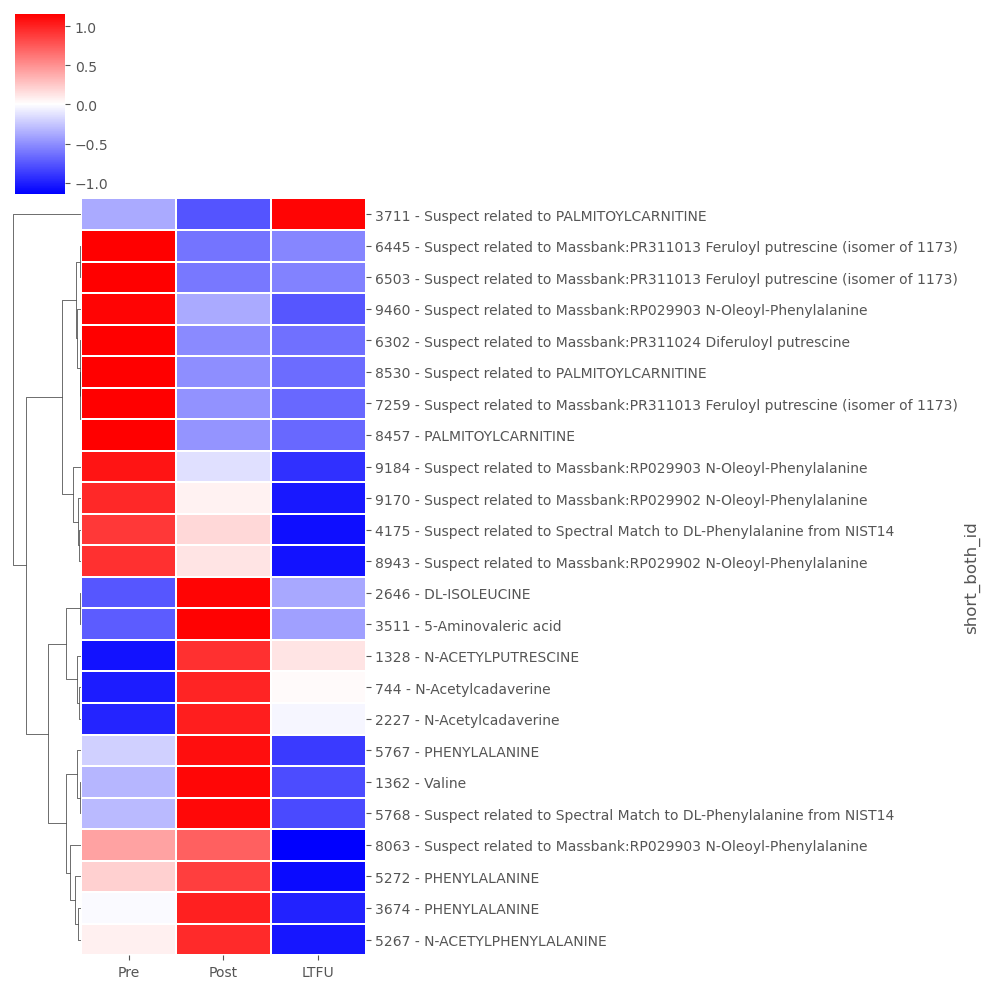

In [115]:
Ag = sns.clustermap(keymetab, z_score=0, cmap="bwr",
               linewidths=0.3, col_cluster=False)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/keymetab_zscore_clustermap_all.svg', dpi=300, bbox_inches="tight")
#row_order = g.dendrogram_row.reordered_ind

In [116]:
keymetab_df = pd.merge(metadata[['collection_timepoint', 'marmoset_id']], keymetab_table, left_index=True, right_index=True)
TB_keymetab_df = keymetab_df[keymetab_df['marmoset_id']=='tammy_bane']
TB_keymetab_df2 = TB_keymetab_df.drop(columns=['marmoset_id'])
TB_keymetab_df2 = TB_keymetab_df2.set_index('collection_timepoint')
df_TB_keymetab = TB_keymetab_df2.T
df_TB_keymetab2 = df_TB_keymetab.groupby(df_TB_keymetab.columns, axis=1).mean()
df_TB_keymetab3 = df_TB_keymetab2[reorderlist]
df_TB_keymetab3

collection_timepoint           Pre          Post          LTFU
3711                  3.381541e+02  6.988822e+01  7.617256e+01
9460                  3.935741e+04  0.000000e+00  0.000000e+00
8063                  3.913334e+04  2.782723e+03  7.018664e+03
8943                  5.701571e+04  2.790069e+04  8.294452e+03
8457                  4.674211e+04  5.139341e+03  0.000000e+00
9184                  5.069705e+04  2.202926e+04  1.353471e+04
8530                  3.220094e+05  8.455395e+03  0.000000e+00
9170                  1.265475e+05  3.963175e+04  2.742045e+04
744                   7.927055e+06  2.081633e+07  2.529723e+07
5272                  1.939290e+03  9.773715e+02  0.000000e+00
5767                  1.758755e+03  4.322580e+02  0.000000e+00
5267                  1.036110e+04  7.240951e+03  1.586911e+03
3674                  2.698786e+04  2.078179e+04  4.901349e+03
5768                  6.962315e+03  3.839557e+03  3.354962e+02
4175                  1.941090e+04  2.018241e+04  8.697155e+03
2227                  4.950874e+06  1.260260e+07  1.256368e+07
3511                  1.207066e+07  4.690010e+07  1.560217e+07
1362                  1.675482e+07  1.640337e+07  1.176845e+07
2646                  3.962024e+07  2.456602e+07  1.476521e+07
6302                  3.781576e+03  5.756369e+03  0.000000e+00
6445                  1.195080e+04  8.403641e+03  5.618797e+03
6503                  4.820741e+04  5.916166e+04  2.798300e+04
7259                  5.716100e+03  2.857726e+03  0.000000e+00
1328                  5.052229e+06  1.034570e+07  2.145674e+07

In [117]:
TBkeymetab = pd.merge(metab_id[['both_id']], df_TB_keymetab3, left_index=True, right_index=True)
TBkeymetab.tail()

both_id            Pre  \
8530  8530 - Suspect related to PALMITOYLCARNITINE (...  322009.413333   
8943  8943 - Suspect related to Massbank:RP029902 N-...   57015.714333   
9170  9170 - Suspect related to Massbank:RP029902 N-...  126547.489333   
9184  9184 - Suspect related to Massbank:RP029903 N-...   50697.048000   
9460  9460 - Suspect related to Massbank:RP029903 N-...   39357.414760   

            Post        LTFU  
8530   8455.3953      0.0000  
8943  27900.6885   8294.4522  
9170  39631.7525  27420.4455  
9184  22029.2605  13534.7055  
9460      0.0000      0.0000

In [118]:
TBkeymetab['short_both_id'] = metab_names
TBkeymetab.drop(columns=['both_id'], inplace=True)
TBkeymetab.set_index('short_both_id', inplace=True)
TBkeymetab.head()

Pre        Post         LTFU
short_both_id                                                   
744 - N-Acetylcadaverine   7.927055e+06  20816328.0  25297230.00
1328 - N-ACETYLPUTRESCINE  5.052229e+06  10345695.5  21456738.00
1362 - Valine              1.675482e+07  16403368.5  11768452.75
2227 - N-Acetylcadaverine  4.950874e+06  12602596.5  12563682.00
2646 - DL-ISOLEUCINE       3.962024e+07  24566023.5  14765208.00

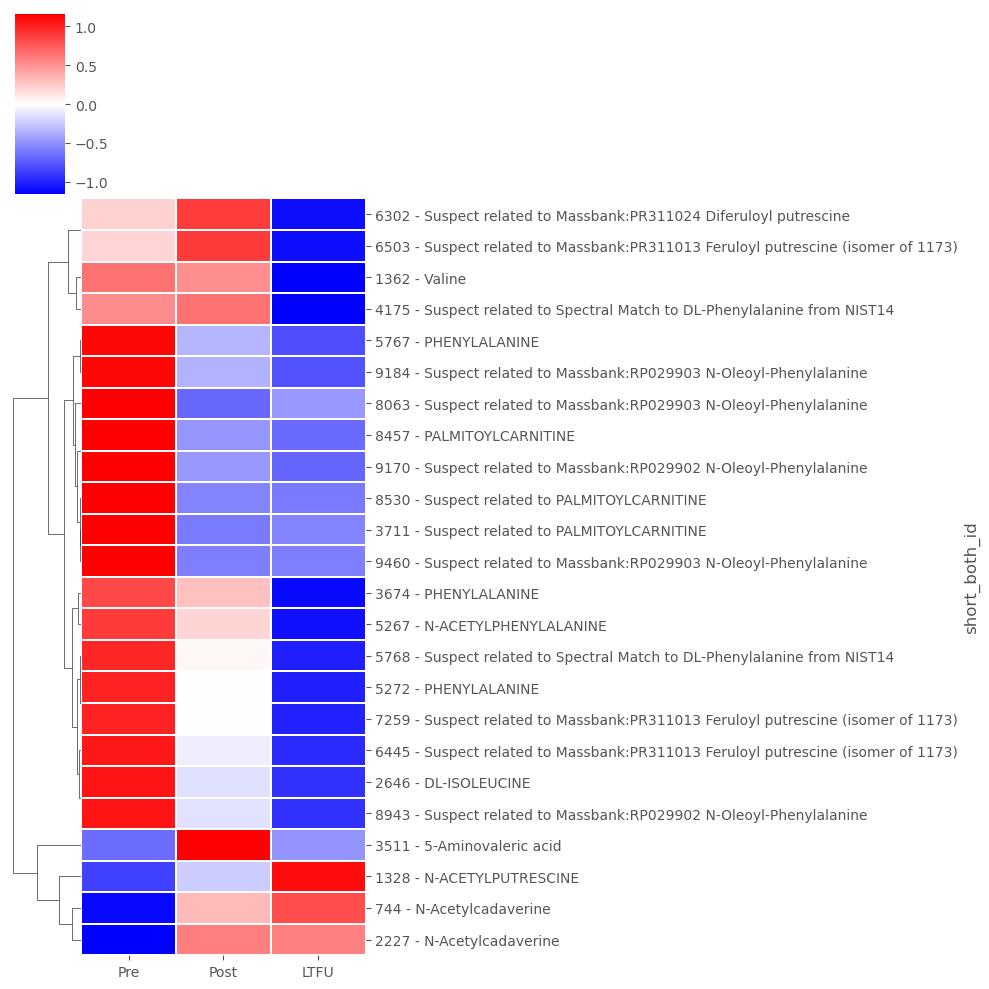

In [119]:
TBg = sns.clustermap(TBkeymetab, z_score=0, cmap="bwr",
               linewidths=0.3, col_cluster=False)
plt.savefig('../figures/keymetab_zscore_clustermap_TB.png', dpi=300, bbox_inches="tight")

In [120]:
reordered_metab_all = Ag.data2d
reordered_metab_all_list = list(reordered_metab_all.index)
TBkeymetab2 = TBkeymetab.reindex(reordered_metab_all_list)
TBkeymetab2

Pre  \
short_both_id                                                      
3711 - Suspect related to PALMITOYLCARNITINE        3.381541e+02   
6445 - Suspect related to Massbank:PR311013 Fer...  1.195080e+04   
6503 - Suspect related to Massbank:PR311013 Fer...  4.820741e+04   
9460 - Suspect related to Massbank:RP029903 N-O...  3.935741e+04   
6302 - Suspect related to Massbank:PR311024 Dif...  3.781576e+03   
8530 - Suspect related to PALMITOYLCARNITINE        3.220094e+05   
7259 - Suspect related to Massbank:PR311013 Fer...  5.716100e+03   
8457 - PALMITOYLCARNITINE                           4.674211e+04   
9184 - Suspect related to Massbank:RP029903 N-O...  5.069705e+04   
9170 - Suspect related to Massbank:RP029902 N-O...  1.265475e+05   
4175 - Suspect related to Spectral Match to DL-...  1.941090e+04   
8943 - Suspect related to Massbank:RP029902 N-O...  5.701571e+04   
2646 - DL-ISOLEUCINE                                3.962024e+07   
3511 - 5-Aminovaleric acid                          1.207066e+07   
1328 - N-ACETYLPUTRESCINE                           5.052229e+06   
744 - N-Acetylcadaverine                            7.927055e+06   
2227 - N-Acetylcadaverine                           4.950874e+06   
5767 - PHENYLALANINE                                1.758755e+03   
1362 - Valine                                       1.675482e+07   
5768 - Suspect related to Spectral Match to DL-...  6.962315e+03   
8063 - Suspect related to Massbank:RP029903 N-O...  3.913334e+04   
5272 - PHENYLALANINE                                1.939290e+03   
3674 - PHENYLALANINE                                2.698786e+04   
5267 - N-ACETYLPHENYLALANINE                        1.036110e+04   

                                                            Post          LTFU  
short_both_id                                                                   
3711 - Suspect related to PALMITOYLCARNITINE        6.988822e+01  7.617256e+01  
6445 - Suspect related to Massbank:PR311013 Fer...  8.403641e+03  5.618797e+03  
6503 - Suspect related to Massbank:PR311013 Fer...  5.916166e+04  2.798300e+04  
9460 - Suspect related to Massbank:RP029903 N-O...  0.000000e+00  0.000000e+00  
6302 - Suspect related to Massbank:PR311024 Dif...  5.756369e+03  0.000000e+00  
8530 - Suspect related to PALMITOYLCARNITINE        8.455395e+03  0.000000e+00  
7259 - Suspect related to Massbank:PR311013 Fer...  2.857726e+03  0.000000e+00  
8457 - PALMITOYLCARNITINE                           5.139341e+03  0.000000e+00  
9184 - Suspect related to Massbank:RP029903 N-O...  2.202926e+04  1.353471e+04  
9170 - Suspect related to Massbank:RP029902 N-O...  3.963175e+04  2.742045e+04  
4175 - Suspect related to Spectral Match to DL-...  2.018241e+04  8.697155e+03  
8943 - Suspect related to Massbank:RP029902 N-O...  2.790069e+04  8.294452e+03  
2646 - DL-ISOLEUCINE                                2.456602e+07  1.476521e+07  
3511 - 5-Aminovaleric acid                          4.690010e+07  1.560217e+07  
1328 - N-ACETYLPUTRESCINE                           1.034570e+07  2.145674e+07  
744 - N-Acetylcadaverine                            2.081633e+07  2.529723e+07  
2227 - N-Acetylcadaverine                           1.260260e+07  1.256368e+07  
5767 - PHENYLALANINE                                4.322580e+02  0.000000e+00  
1362 - Valine                                       1.640337e+07  1.176845e+07  
5768 - Suspect related to Spectral Match to DL-...  3.839557e+03  3.354962e+02  
8063 - Suspect related to Massbank:RP029903 N-O...  2.782723e+03  7.018664e+03  
5272 - PHENYLALANINE                                9.773715e+02  0.000000e+00  
3674 - PHENYLALANINE                                2.078179e+04  4.901349e+03  
5267 - N-ACETYLPHENYLALANINE                        7.240951e+03  1.586911e+03

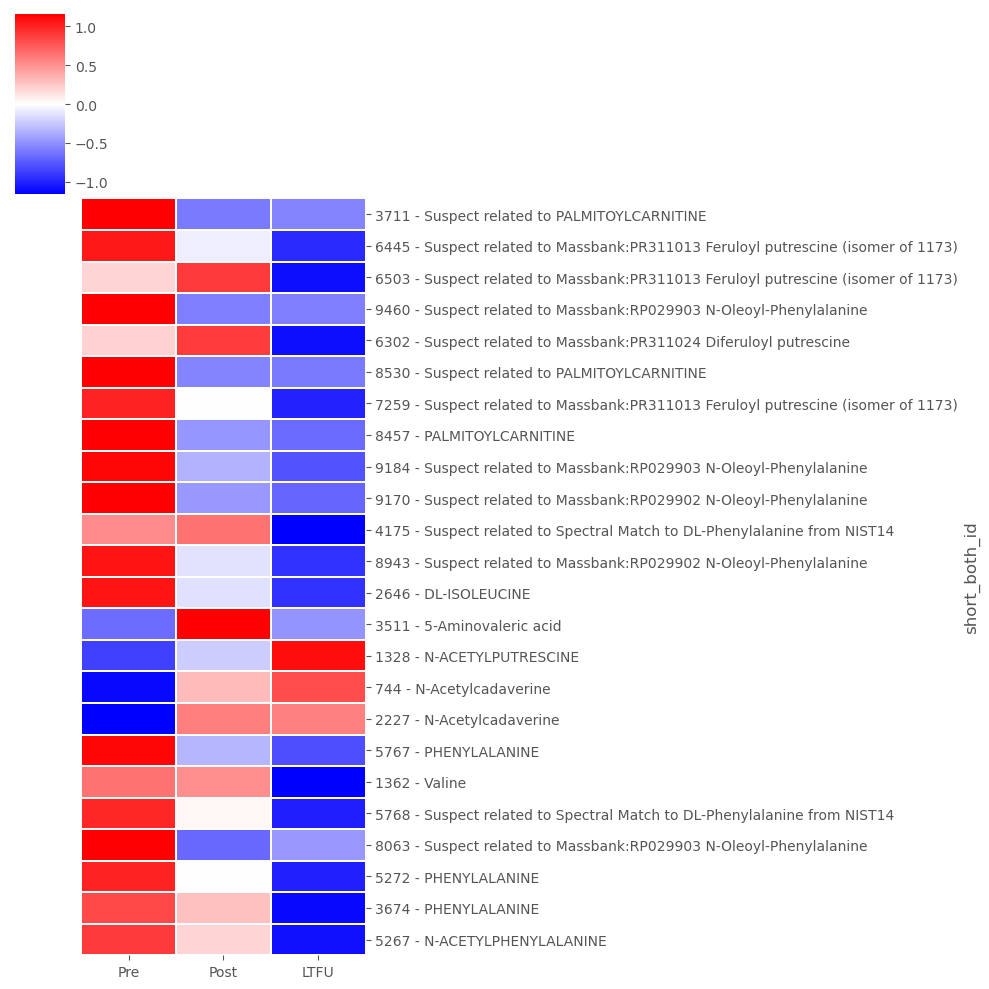

In [121]:
g = sns.clustermap(TBkeymetab2, z_score=0, cmap="bwr",
               linewidths=0.3, row_cluster=False, col_cluster=False)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/keymetab_zscore_clustermap_TB-allorder.svg', dpi=300, bbox_inches="tight")
#same row order as TB

In [122]:
keymetab_df = pd.merge(metadata[['collection_timepoint', 'marmoset_id']], keymetab_table, left_index=True, right_index=True)
EM_keymetab_df = keymetab_df[keymetab_df['marmoset_id']=='ellen_mac']
EM_keymetab_df2 = EM_keymetab_df.drop(columns=['marmoset_id'])
EM_keymetab_df2 = EM_keymetab_df2.set_index('collection_timepoint')
df_EM_keymetab = EM_keymetab_df2.T
df_EM_keymetab2 = df_EM_keymetab.groupby(df_EM_keymetab.columns, axis=1).mean()
df_EM_keymetab3 = df_EM_keymetab2[reorderlist]
df_EM_keymetab3

collection_timepoint           Pre          Post          LTFU
3711                  6.123387e+02  4.336704e+01  3.521192e+02
9460                  2.331140e+03  1.518994e+03  1.822651e+02
8063                  5.659048e+03  1.842069e+04  1.174012e+04
8943                  6.391537e+04  2.387647e+04  1.889641e+04
8457                  1.843116e+04  4.689100e+02  1.997417e+03
9184                  1.622575e+05  4.283893e+04  1.798541e+04
8530                  3.363658e+04  5.535538e+02  4.352102e+03
9170                  2.383232e+05  6.442344e+04  2.169166e+04
744                   7.606728e+06  4.687078e+07  2.981460e+07
5272                  2.240830e+04  1.424694e+03  0.000000e+00
5767                  1.997691e+04  1.016823e+03  0.000000e+00
5267                  9.551984e+04  1.713829e+04  6.589101e+03
3674                  3.104797e+04  1.565010e+04  0.000000e+00
5768                  1.070466e+05  1.280730e+04  3.835359e+03
4175                  5.181711e+04  1.081101e+04  7.060193e+03
2227                  3.657973e+06  2.323513e+07  1.679026e+07
3511                  1.872948e+07  6.564909e+07  4.807308e+07
1362                  2.063078e+07  1.899245e+07  9.315191e+06
2646                  4.142325e+07  2.554752e+07  7.738225e+06
6302                  6.230256e+04  3.797976e+02  5.181170e+02
6445                  9.727299e+04  6.500427e+03  5.009748e+03
6503                  3.825925e+05  2.793497e+04  2.345974e+04
7259                  3.773684e+04  3.205906e+03  0.000000e+00
1328                  3.094435e+06  3.185052e+07  1.713846e+07

In [123]:
EMkeymetab = pd.merge(metab_id[['both_id']], df_EM_keymetab3, left_index=True, right_index=True)
EMkeymetab.tail()

both_id            Pre  \
8530  8530 - Suspect related to PALMITOYLCARNITINE (...   33636.578250   
8943  8943 - Suspect related to Massbank:RP029902 N-...   63915.372000   
9170  9170 - Suspect related to Massbank:RP029902 N-...  238323.165000   
9184  9184 - Suspect related to Massbank:RP029903 N-...  162257.523000   
9460  9460 - Suspect related to Massbank:RP029903 N-...    2331.140075   

              Post         LTFU  
8530    553.553825   4352.10150  
8943  23876.474000  18896.41200  
9170  64423.442750  21691.66000  
9184  42838.930250  17985.41350  
9460   1518.993940    182.26505

In [124]:
EMkeymetab['short_both_id'] = metab_names
EMkeymetab.drop(columns=['both_id'], inplace=True)
EMkeymetab.set_index('short_both_id', inplace=True)
EMkeymetab.head()

Pre         Post         LTFU
short_both_id                                                    
744 - N-Acetylcadaverine   7.606728e+06  46870785.00  29814600.00
1328 - N-ACETYLPUTRESCINE  3.094435e+06  31850519.50  17138461.50
1362 - Valine              2.063078e+07  18992451.75   9315190.75
2227 - N-Acetylcadaverine  3.657973e+06  23235134.00  16790261.00
2646 - DL-ISOLEUCINE       4.142325e+07  25547516.00   7738225.00

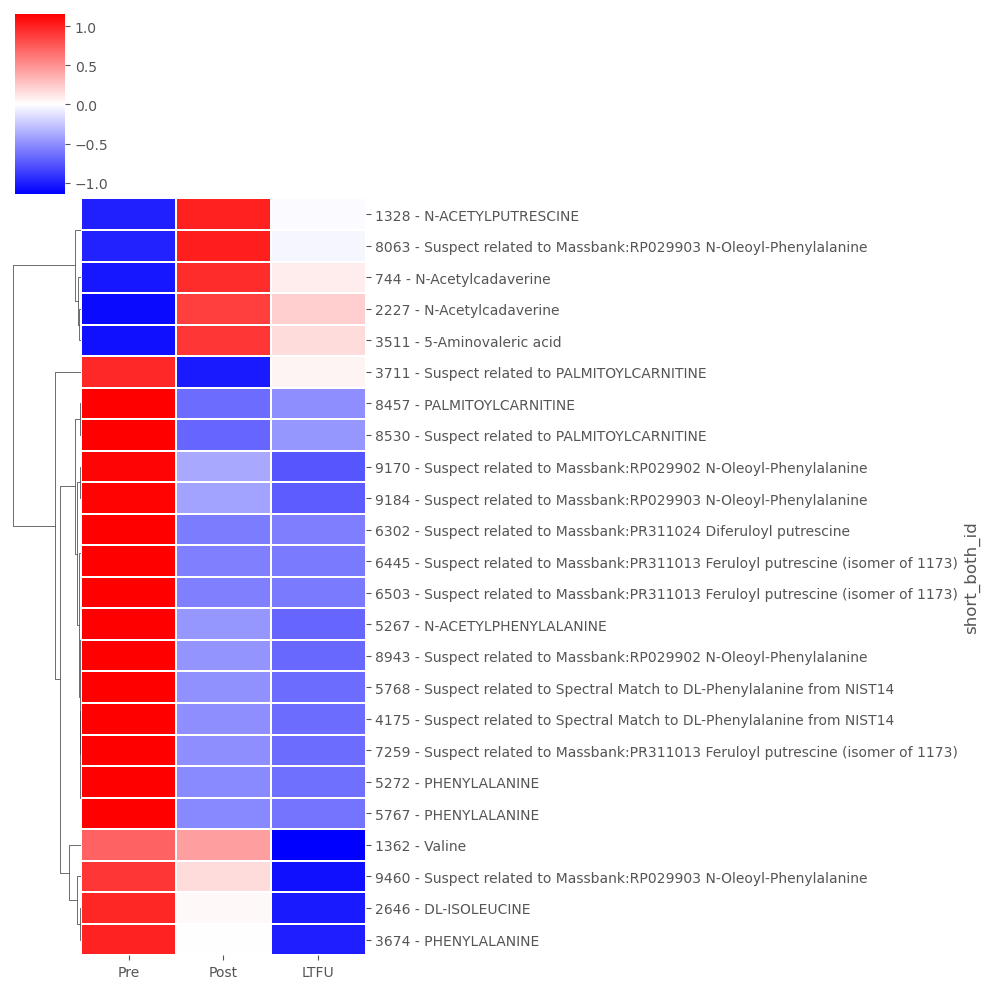

In [125]:
g = sns.clustermap(EMkeymetab, z_score=0, cmap="bwr",
               linewidths=0.3, col_cluster=False)
plt.savefig('../figures/keymetab_zscore_clustermap_EM.png', dpi=300, bbox_inches="tight")

In [126]:
reordered_TB = TBg.data2d
reordered_TB_list = list(reordered_TB.index)
EMkeymetab2 = EMkeymetab.reindex(reordered_TB_list)
EMkeymetab2

Pre  \
short_both_id                                                      
6302 - Suspect related to Massbank:PR311024 Dif...  6.230256e+04   
6503 - Suspect related to Massbank:PR311013 Fer...  3.825925e+05   
1362 - Valine                                       2.063078e+07   
4175 - Suspect related to Spectral Match to DL-...  5.181711e+04   
5767 - PHENYLALANINE                                1.997691e+04   
9184 - Suspect related to Massbank:RP029903 N-O...  1.622575e+05   
8063 - Suspect related to Massbank:RP029903 N-O...  5.659048e+03   
8457 - PALMITOYLCARNITINE                           1.843116e+04   
9170 - Suspect related to Massbank:RP029902 N-O...  2.383232e+05   
8530 - Suspect related to PALMITOYLCARNITINE        3.363658e+04   
3711 - Suspect related to PALMITOYLCARNITINE        6.123387e+02   
9460 - Suspect related to Massbank:RP029903 N-O...  2.331140e+03   
3674 - PHENYLALANINE                                3.104797e+04   
5267 - N-ACETYLPHENYLALANINE                        9.551984e+04   
5768 - Suspect related to Spectral Match to DL-...  1.070466e+05   
5272 - PHENYLALANINE                                2.240830e+04   
7259 - Suspect related to Massbank:PR311013 Fer...  3.773684e+04   
6445 - Suspect related to Massbank:PR311013 Fer...  9.727299e+04   
2646 - DL-ISOLEUCINE                                4.142325e+07   
8943 - Suspect related to Massbank:RP029902 N-O...  6.391537e+04   
3511 - 5-Aminovaleric acid                          1.872948e+07   
1328 - N-ACETYLPUTRESCINE                           3.094435e+06   
744 - N-Acetylcadaverine                            7.606728e+06   
2227 - N-Acetylcadaverine                           3.657973e+06   

                                                            Post          LTFU  
short_both_id                                                                   
6302 - Suspect related to Massbank:PR311024 Dif...  3.797976e+02  5.181170e+02  
6503 - Suspect related to Massbank:PR311013 Fer...  2.793497e+04  2.345974e+04  
1362 - Valine                                       1.899245e+07  9.315191e+06  
4175 - Suspect related to Spectral Match to DL-...  1.081101e+04  7.060193e+03  
5767 - PHENYLALANINE                                1.016823e+03  0.000000e+00  
9184 - Suspect related to Massbank:RP029903 N-O...  4.283893e+04  1.798541e+04  
8063 - Suspect related to Massbank:RP029903 N-O...  1.842069e+04  1.174012e+04  
8457 - PALMITOYLCARNITINE                           4.689100e+02  1.997417e+03  
9170 - Suspect related to Massbank:RP029902 N-O...  6.442344e+04  2.169166e+04  
8530 - Suspect related to PALMITOYLCARNITINE        5.535538e+02  4.352102e+03  
3711 - Suspect related to PALMITOYLCARNITINE        4.336704e+01  3.521192e+02  
9460 - Suspect related to Massbank:RP029903 N-O...  1.518994e+03  1.822651e+02  
3674 - PHENYLALANINE                                1.565010e+04  0.000000e+00  
5267 - N-ACETYLPHENYLALANINE                        1.713829e+04  6.589101e+03  
5768 - Suspect related to Spectral Match to DL-...  1.280730e+04  3.835359e+03  
5272 - PHENYLALANINE                                1.424694e+03  0.000000e+00  
7259 - Suspect related to Massbank:PR311013 Fer...  3.205906e+03  0.000000e+00  
6445 - Suspect related to Massbank:PR311013 Fer...  6.500427e+03  5.009748e+03  
2646 - DL-ISOLEUCINE                                2.554752e+07  7.738225e+06  
8943 - Suspect related to Massbank:RP029902 N-O...  2.387647e+04  1.889641e+04  
3511 - 5-Aminovaleric acid                          6.564909e+07  4.807308e+07  
1328 - N-ACETYLPUTRESCINE                           3.185052e+07  1.713846e+07  
744 - N-Acetylcadaverine                            4.687078e+07  2.981460e+07  
2227 - N-Acetylcadaverine                           2.323513e+07  1.679026e+07

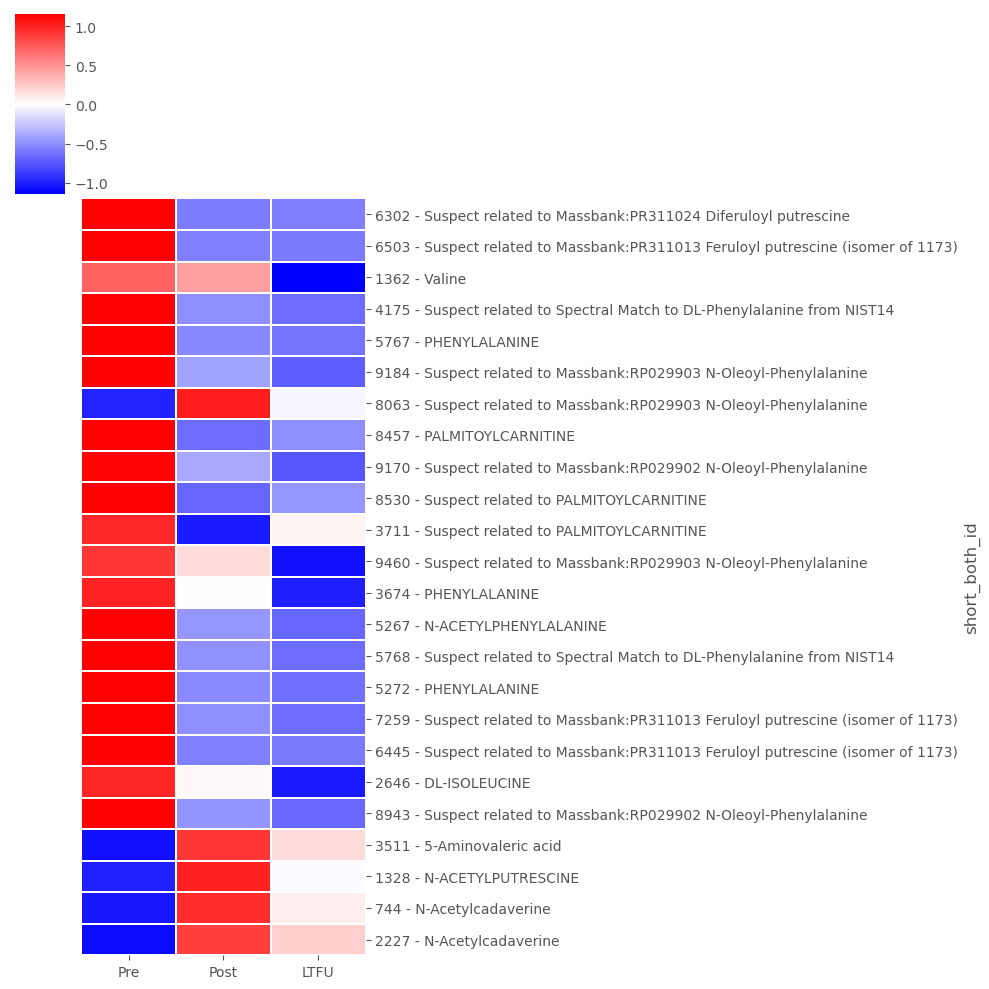

In [127]:
g = sns.clustermap(EMkeymetab2, z_score=0, cmap="bwr",
               linewidths=0.3, row_cluster=False, col_cluster=False)
plt.savefig('../figures/keymetab_zscore_clustermap_EM_TBorder.png', dpi=300, bbox_inches="tight")
#same row order as TB

### Microbiome

In [42]:
micro_table = q2.Artifact.load('../data/Microbiome/pool_filtered_pergenome/RPCA/gemelli_filtered.qza')
micro_table_df = micro_table.view(pd.DataFrame)
micro_table_df.head()
#raw read counts

G000006865  G000006925  G000007145  G000007325  G000007525  \
14577.EM.TP1         25.0        77.0         2.0        46.0       971.0   
14577.GK.TP1         10.0         0.0         0.0        44.0        46.0   
14577.AB.TP1        680.0         2.0       506.0       217.0       115.0   
14577.JR.TP1          1.0      7761.0         1.0        14.0       987.0   
14577.MA.TP11        66.0      2984.0       830.0        10.0      1337.0   

               G000007785  G000008865  G000009925  G000010425  G000011065  \
14577.EM.TP1          2.0        87.0       228.0       303.0        97.0   
14577.GK.TP1          0.0         0.0      2426.0        20.0      1080.0   
14577.AB.TP1         18.0         3.0      3904.0        35.0      5432.0   
14577.JR.TP1          3.0      8604.0      2443.0       321.0      1458.0   
14577.MA.TP11         6.0      3203.0       999.0      1564.0       434.0   

               ...  G902363565  G902363595  G902363685  G902363725  \
14577.EM.TP1   ...        17.0         3.0         3.0         2.0   
14577.GK.TP1   ...        62.0         6.0         8.0         2.0   
14577.AB.TP1   ...        35.0        16.0        57.0        92.0   
14577.JR.TP1   ...        48.0        11.0        15.0        17.0   
14577.MA.TP11  ...       181.0        15.0        90.0        50.0   

               G902364485  G902385285  G902387315  G902501965  G902762555  \
14577.EM.TP1          9.0       115.0         2.0       446.0         0.0   
14577.GK.TP1          6.0      1033.0       256.0        52.0         9.0   
14577.AB.TP1         35.0      1583.0        89.0        79.0        13.0   
14577.JR.TP1         26.0       631.0      2619.0       131.0         7.0   
14577.MA.TP11       160.0       414.0      1154.0       523.0         9.0   

               G902777695  
14577.EM.TP1          0.0  
14577.GK.TP1         24.0  
14577.AB.TP1         20.0  
14577.JR.TP1         14.0  
14577.MA.TP11         8.0  

[5 rows x 624 columns]

In [43]:
keymicro_table = micro_table_df.filter(items=microbes_list, axis=1)
keymicro_table.shape

(82, 166)

In [44]:
keymicro_df = pd.merge(metadata[['collection_timepoint']], keymicro_table, left_index=True, right_index=True)
keymicro_df.head()

collection_timepoint  G000800475  G000379965  G008273775  \
14577.AB.TP1                   Pre        10.0         3.0         4.0   
14577.AB.TP10                 LTFU         8.0         0.0        90.0   
14577.AB.TP11                 LTFU         8.0        56.0     16525.0   
14577.AB.TP2                   Pre        14.0         0.0         3.0   
14577.AB.TP3                   Pre         9.0         4.0        71.0   

               G000741785  G000598465  G000157935  G001683355  G000944855  \
14577.AB.TP1        303.0       207.0       334.0         4.0         2.0   
14577.AB.TP10       151.0       189.0       392.0         1.0        76.0   
14577.AB.TP11       460.0      1852.0    154114.0        53.0     15721.0   
14577.AB.TP2        740.0        11.0        16.0         1.0         2.0   
14577.AB.TP3        242.0       771.0      1145.0         7.0        65.0   

               G000299455  ...  G000185845  G001444445  G000455445  \
14577.AB.TP1          4.0  ...        29.0         8.0       147.0   
14577.AB.TP10       100.0  ...        50.0        10.0       251.0   
14577.AB.TP11     19695.0  ...        85.0        29.0       228.0   
14577.AB.TP2          3.0  ...         4.0         1.0        28.0   
14577.AB.TP3         73.0  ...        77.0        23.0       424.0   

               G001318345  G004792655  G000762865  G012161415  G000741525  \
14577.AB.TP1        607.0       248.0        67.0         1.0         6.0   
14577.AB.TP10       496.0       369.0        60.0        19.0         3.0   
14577.AB.TP11       819.0       470.0       182.0      3287.0         7.0   
14577.AB.TP2         70.0        42.0        12.0         0.0         9.0   
14577.AB.TP3       1144.0       651.0       139.0        16.0         4.0   

               G012357415  G000011065  
14577.AB.TP1          2.0      5432.0  
14577.AB.TP10        70.0      5944.0  
14577.AB.TP11     12872.0      3385.0  
14577.AB.TP2          2.0       359.0  
14577.AB.TP3         53.0     13203.0  

[5 rows x 167 columns]

In [45]:
keymicro_df2 = keymicro_df.set_index('collection_timepoint')
keymicro_df2.head()

G000800475  G000379965  G008273775  G000741785  \
collection_timepoint                                                   
Pre                         10.0         3.0         4.0       303.0   
LTFU                         8.0         0.0        90.0       151.0   
LTFU                         8.0        56.0     16525.0       460.0   
Pre                         14.0         0.0         3.0       740.0   
Pre                          9.0         4.0        71.0       242.0   

                      G000598465  G000157935  G001683355  G000944855  \
collection_timepoint                                                   
Pre                        207.0       334.0         4.0         2.0   
LTFU                       189.0       392.0         1.0        76.0   
LTFU                      1852.0    154114.0        53.0     15721.0   
Pre                         11.0        16.0         1.0         2.0   
Pre                        771.0      1145.0         7.0        65.0   

                      G000299455  G002251435  ...  G000185845  G001444445  \
collection_timepoint                          ...                           
Pre                          4.0       141.0  ...        29.0         8.0   
LTFU                       100.0        88.0  ...        50.0        10.0   
LTFU                     19695.0       299.0  ...        85.0        29.0   
Pre                          3.0         3.0  ...         4.0         1.0   
Pre                         73.0       306.0  ...        77.0        23.0   

                      G000455445  G001318345  G004792655  G000762865  \
collection_timepoint                                                   
Pre                        147.0       607.0       248.0        67.0   
LTFU                       251.0       496.0       369.0        60.0   
LTFU                       228.0       819.0       470.0       182.0   
Pre                         28.0        70.0        42.0        12.0   
Pre                        424.0      1144.0       651.0       139.0   

                      G012161415  G000741525  G012357415  G000011065  
collection_timepoint                                                  
Pre                          1.0         6.0         2.0      5432.0  
LTFU                        19.0         3.0        70.0      5944.0  
LTFU                      3287.0         7.0     12872.0      3385.0  
Pre                          0.0         9.0         2.0       359.0  
Pre                         16.0         4.0        53.0     13203.0  

[5 rows x 166 columns]

In [46]:
df_keymicro = keymicro_df2.T
df_keymicro2 = df_keymicro.groupby(df_keymicro.columns, axis=1).mean()
df_keymicro2
#average all marmosets for each time grouping

collection_timepoint       LTFU         Post          Pre   Transition
G000800475              23.1250    46.833333    39.689655    36.714286
G000379965              26.6250    17.300000    20.137931    33.571429
G008273775            2819.0625  1307.966667  4762.586207  2639.000000
G000741785            2967.2500  7189.733333  6977.758621  6096.428571
G000598465             633.6875   392.733333   319.517241   284.000000
...                         ...          ...          ...          ...
G000762865             110.3125    78.600000   100.344828   140.285714
G012161415             537.3125   276.666667   931.517241   588.571429
G000741525              11.7500    22.766667    17.862069    19.285714
G012357415            2201.8125   880.166667  3071.793103  1727.000000
G000011065            2473.7500  1732.333333  1808.379310  1881.000000

[166 rows x 4 columns]

In [47]:
reorderlist = ['Pre', 'Post', 'LTFU']

In [48]:
df_keymicro2 = df_keymicro2[reorderlist]
df_keymicro2

collection_timepoint          Pre         Post       LTFU
G000800475              39.689655    46.833333    23.1250
G000379965              20.137931    17.300000    26.6250
G008273775            4762.586207  1307.966667  2819.0625
G000741785            6977.758621  7189.733333  2967.2500
G000598465             319.517241   392.733333   633.6875
...                           ...          ...        ...
G000762865             100.344828    78.600000   110.3125
G012161415             931.517241   276.666667   537.3125
G000741525              17.862069    22.766667    11.7500
G012357415            3071.793103   880.166667  2201.8125
G000011065            1808.379310  1732.333333  2473.7500

[166 rows x 3 columns]

In [49]:
taxonomy = pd.read_csv('../../shotgun_scripts/woltka_v2_taxonomy.txt', sep='\t', index_col=0)
taxonomy.head()

Taxon
Feature ID                                                   
G000005825  d__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...
G000006175  d__Archaea; p__Methanobacteriota_A; c__Methano...
G000006605  d__Bacteria; p__Actinobacteriota; c__Actinomyc...
G000006725  d__Bacteria; p__Proteobacteria; c__Gammaproteo...
G000006745  d__Bacteria; p__Proteobacteria; c__Gammaproteo...

In [50]:
taxonomy['species_id'] = taxonomy.Taxon.str.split(";", n=6).str[6]
taxonomy.reset_index(inplace=True)
taxonomy['both_id'] = taxonomy['Feature ID'].astype(str)+" - "+taxonomy['species_id'].astype(str)
taxonomy.set_index('Feature ID', inplace=True)
taxonomy.head()

Taxon  \
Feature ID                                                      
G000005825  d__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...   
G000006175  d__Archaea; p__Methanobacteriota_A; c__Methano...   
G000006605  d__Bacteria; p__Actinobacteriota; c__Actinomyc...   
G000006725  d__Bacteria; p__Proteobacteria; c__Gammaproteo...   
G000006745  d__Bacteria; p__Proteobacteria; c__Gammaproteo...   

                              species_id  \
Feature ID                                 
G000005825    s__Bacillus_S pseudofirmus   
G000006175     s__Methanococcus voltae_A   
G000006605   s__Corynebacterium jeikeium   
G000006725         s__Xylella fastidiosa   
G000006745            s__Vibrio cholerae   

                                              both_id  
Feature ID                                             
G000005825   G000005825 -  s__Bacillus_S pseudofirmus  
G000006175    G000006175 -  s__Methanococcus voltae_A  
G000006605  G000006605 -  s__Corynebacterium jeikeium  
G000006725        G000006725 -  s__Xylella fastidiosa  
G000006745           G000006745 -  s__Vibrio cholerae

In [51]:
keymicro = pd.merge(taxonomy[['both_id']], df_keymicro2, left_index=True, right_index=True)
keymicro.set_index('both_id', inplace=True)
keymicro.head()

Pre         Post  \
both_id                                                                   
G000006925 -  s__Escherichia coli              3197.034483   893.766667   
G000007525 -  s__Bifidobacterium longum         984.137931  1057.000000   
G000008865 -  s__Escherichia coli              3556.275862  1003.033333   
G000009925 -  s__Bacteroides fragilis          2703.827586  2005.900000   
G000010425 -  s__Bifidobacterium adolescentis   565.620690   629.800000   

                                                    LTFU  
both_id                                                   
G000006925 -  s__Escherichia coli              2158.6875  
G000007525 -  s__Bifidobacterium longum         746.0000  
G000008865 -  s__Escherichia coli              2356.8750  
G000009925 -  s__Bacteroides fragilis          3306.3750  
G000010425 -  s__Bifidobacterium adolescentis   400.1250

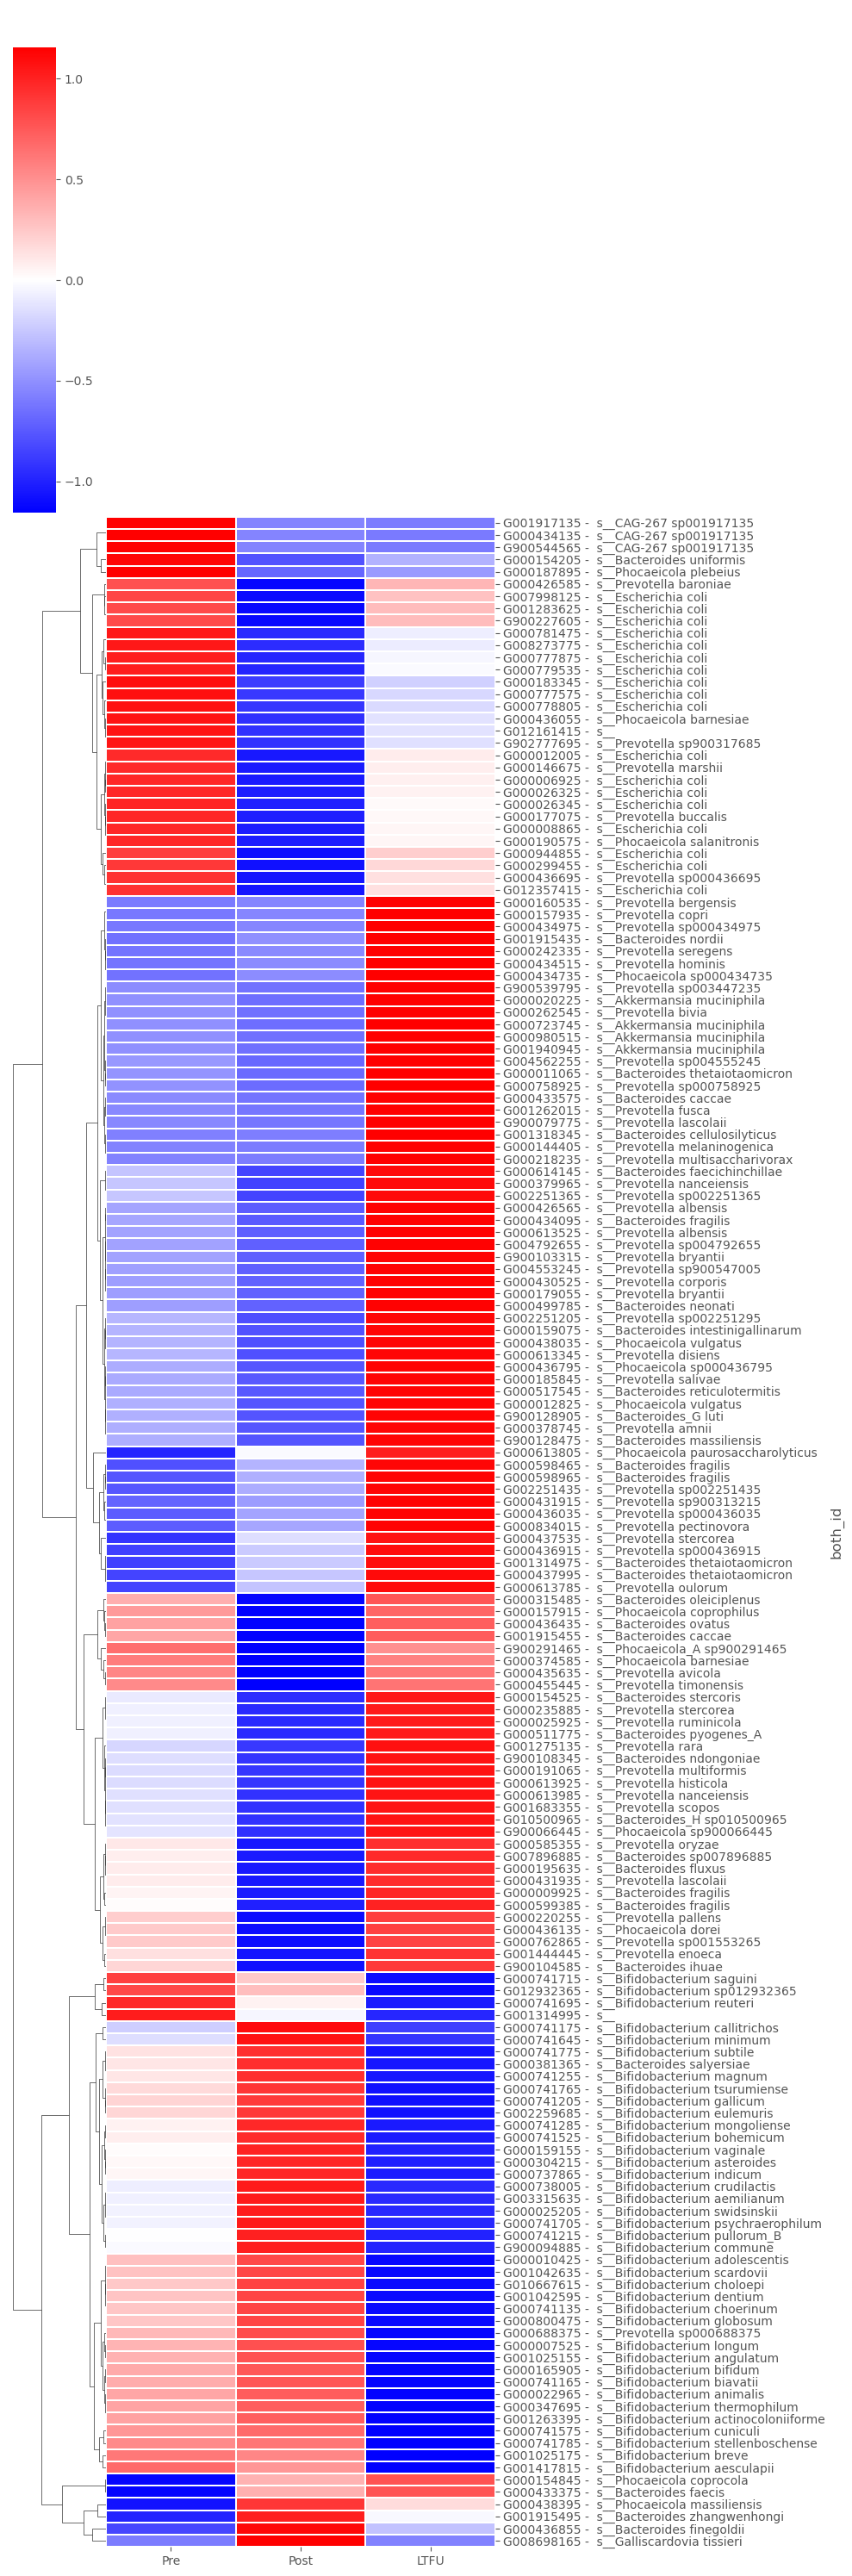

In [99]:
g1 = sns.clustermap(keymicro, z_score=0, cmap="bwr",
               linewidths=0.3, col_cluster=False, yticklabels=1, figsize=(10, 30))
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/keymicro_zscore_clustermap_all.svg', dpi=300, bbox_inches="tight")
#row_order = g.dendrogram_row.reordered_ind

In [53]:
keymicro_df = pd.merge(metadata[['collection_timepoint', 'marmoset_id']], keymicro_table, left_index=True, right_index=True)
TB_keymicro_df = keymicro_df[keymicro_df['marmoset_id']=='tammy_bane']
TB_keymicro_df2 = TB_keymicro_df.drop(columns=['marmoset_id'])
TB_keymicro_df2 = TB_keymicro_df2.set_index('collection_timepoint')
df_TB_keymicro = TB_keymicro_df2.T
df_TB_keymicro2 = df_TB_keymicro.groupby(df_TB_keymicro.columns, axis=1).mean()
df_TB_keymicro3 = df_TB_keymicro2[reorderlist]
df_TB_keymicro3

collection_timepoint           Pre      Post    LTFU
G000800475               28.666667     97.25    44.0
G000379965               62.333333     12.50   103.0
G008273775            11608.666667   1277.50   694.5
G000741785             7790.000000  16496.00  9879.0
G000598465              108.666667     38.50   837.5
...                            ...       ...     ...
G000762865              158.666667     35.50   281.0
G012161415             2149.000000    289.00   120.0
G000741525               12.333333     49.25    23.0
G012357415             7362.666667    883.00   585.0
G000011065              899.666667    144.00  1074.0

[166 rows x 3 columns]

In [54]:
TB_keymicro = pd.merge(taxonomy[['both_id']], df_TB_keymicro3, left_index=True, right_index=True)
TB_keymicro.set_index('both_id', inplace=True)
TB_keymicro.head()

Pre     Post    LTFU
both_id                                                                    
G000006925 -  s__Escherichia coli              7739.333333   896.00   562.0
G000007525 -  s__Bifidobacterium longum         356.666667  1176.75   718.5
G000008865 -  s__Escherichia coli              8604.000000  1011.00   617.0
G000009925 -  s__Bacteroides fragilis          1395.333333   329.25  1253.0
G000010425 -  s__Bifidobacterium adolescentis   121.666667   406.50   246.5

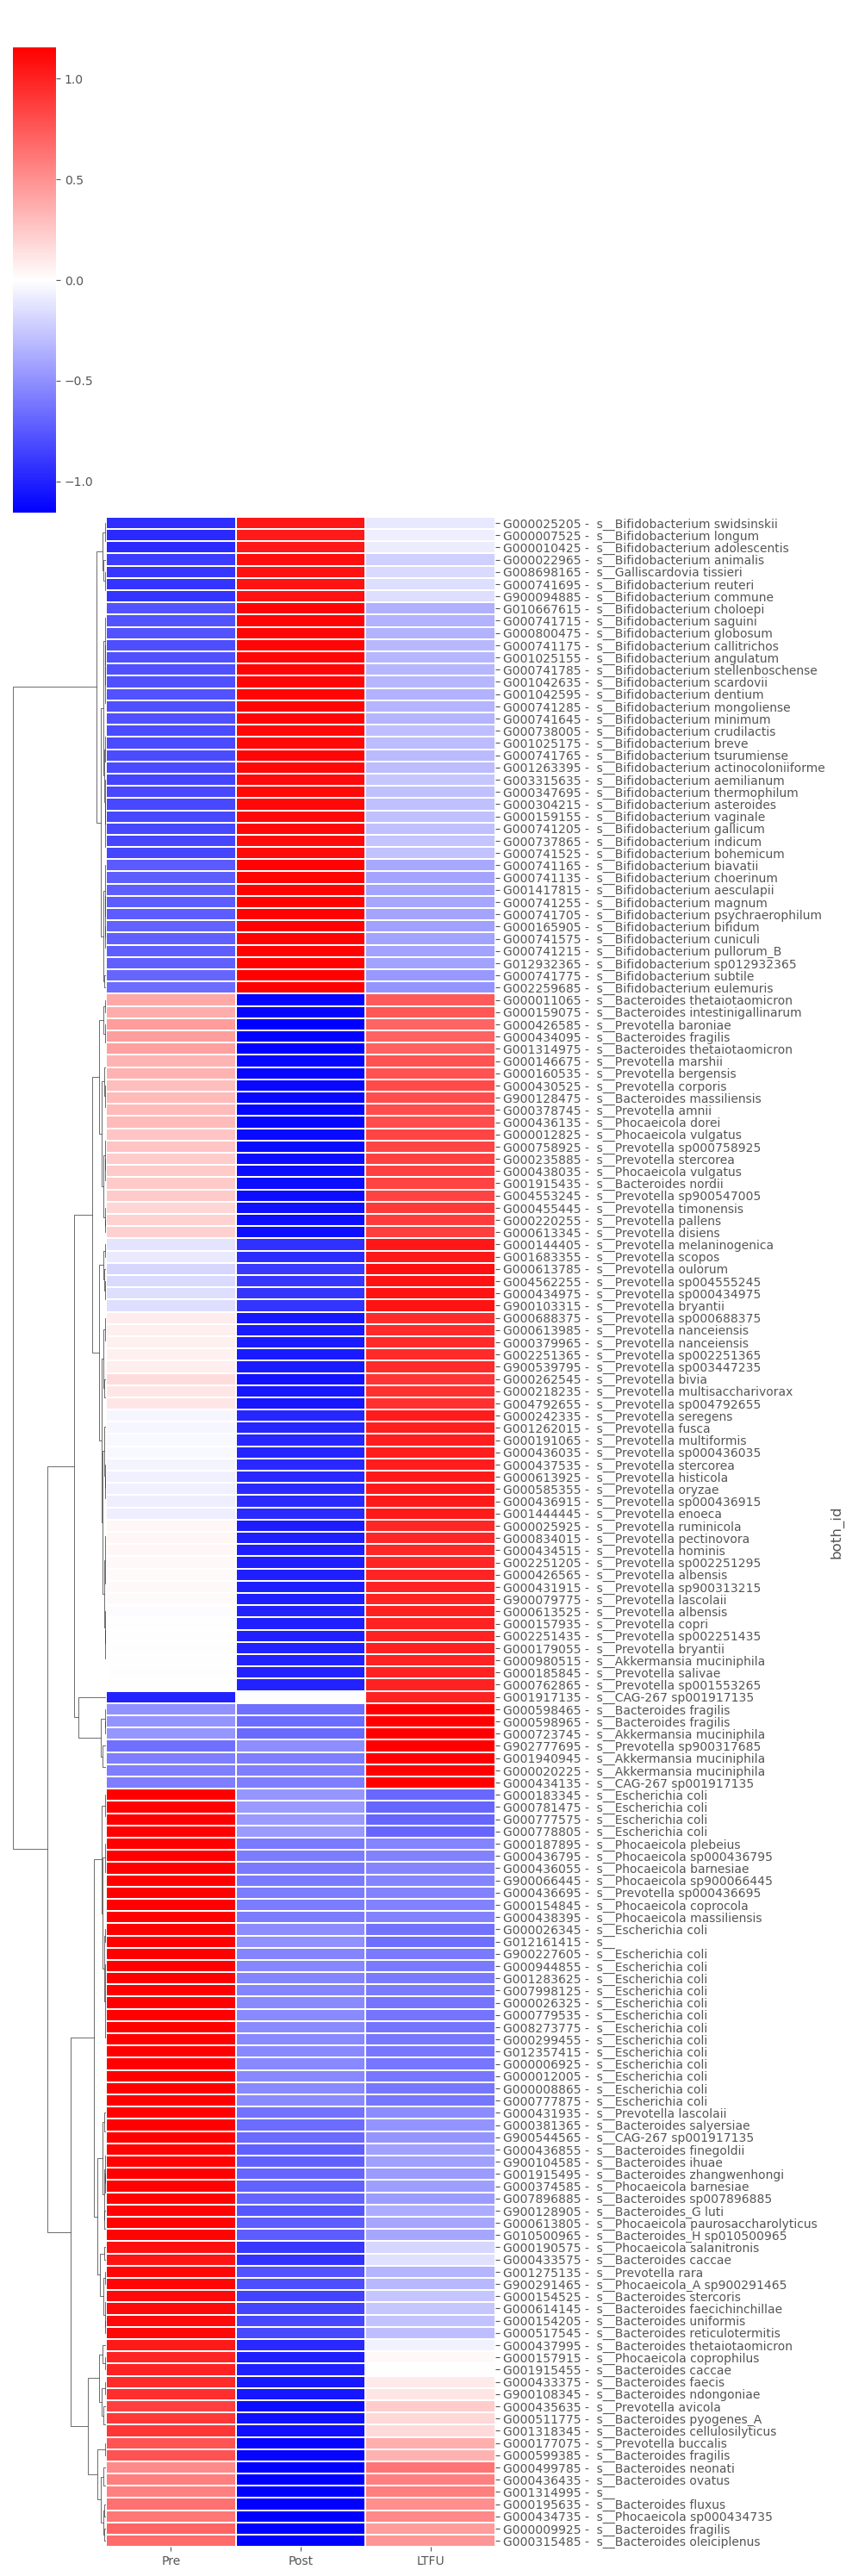

In [55]:
g = sns.clustermap(TB_keymicro, z_score=0, cmap="bwr",
               linewidths=0.3, col_cluster=False, yticklabels=1, figsize=(10, 30))
plt.savefig('../figures/keymicro_zscore_clustermap_TB.png', dpi=300, bbox_inches="tight")

In [88]:
reordered_all = g1.data2d
reordered_all_list = list(reordered_all.index)
TB_keymicro2 = TB_keymicro.reindex(reordered_all_list)

Pre      Post     LTFU
both_id                                                                     
G001917135 -  s__CAG-267 sp001917135             0.000000      0.25      0.5
G000434135 -  s__CAG-267 sp001917135             0.000000      0.00      0.5
G900544565 -  s__CAG-267 sp001917135             2.666667      0.25      0.5
G000154205 -  s__Bacteroides uniformis       32123.000000    910.50   9928.0
G000187895 -  s__Phocaeicola plebeius       102369.333333    719.25   3464.0
...                                                   ...       ...      ...
G000433375 -  s__Bacteroides faecis            855.333333      2.50    488.5
G000438395 -  s__Phocaeicola massiliensis     6730.333333     31.00    146.0
G001915495 -  s__Bacteroides zhangwenhongi     422.333333      6.00     60.0
G000436855 -  s__Bacteroides finegoldii        877.666667     15.75    148.5
G008698165 -  s__Galliscardovia tissieri      1657.666667  51843.50  20523.0

[166 rows x 3 columns]

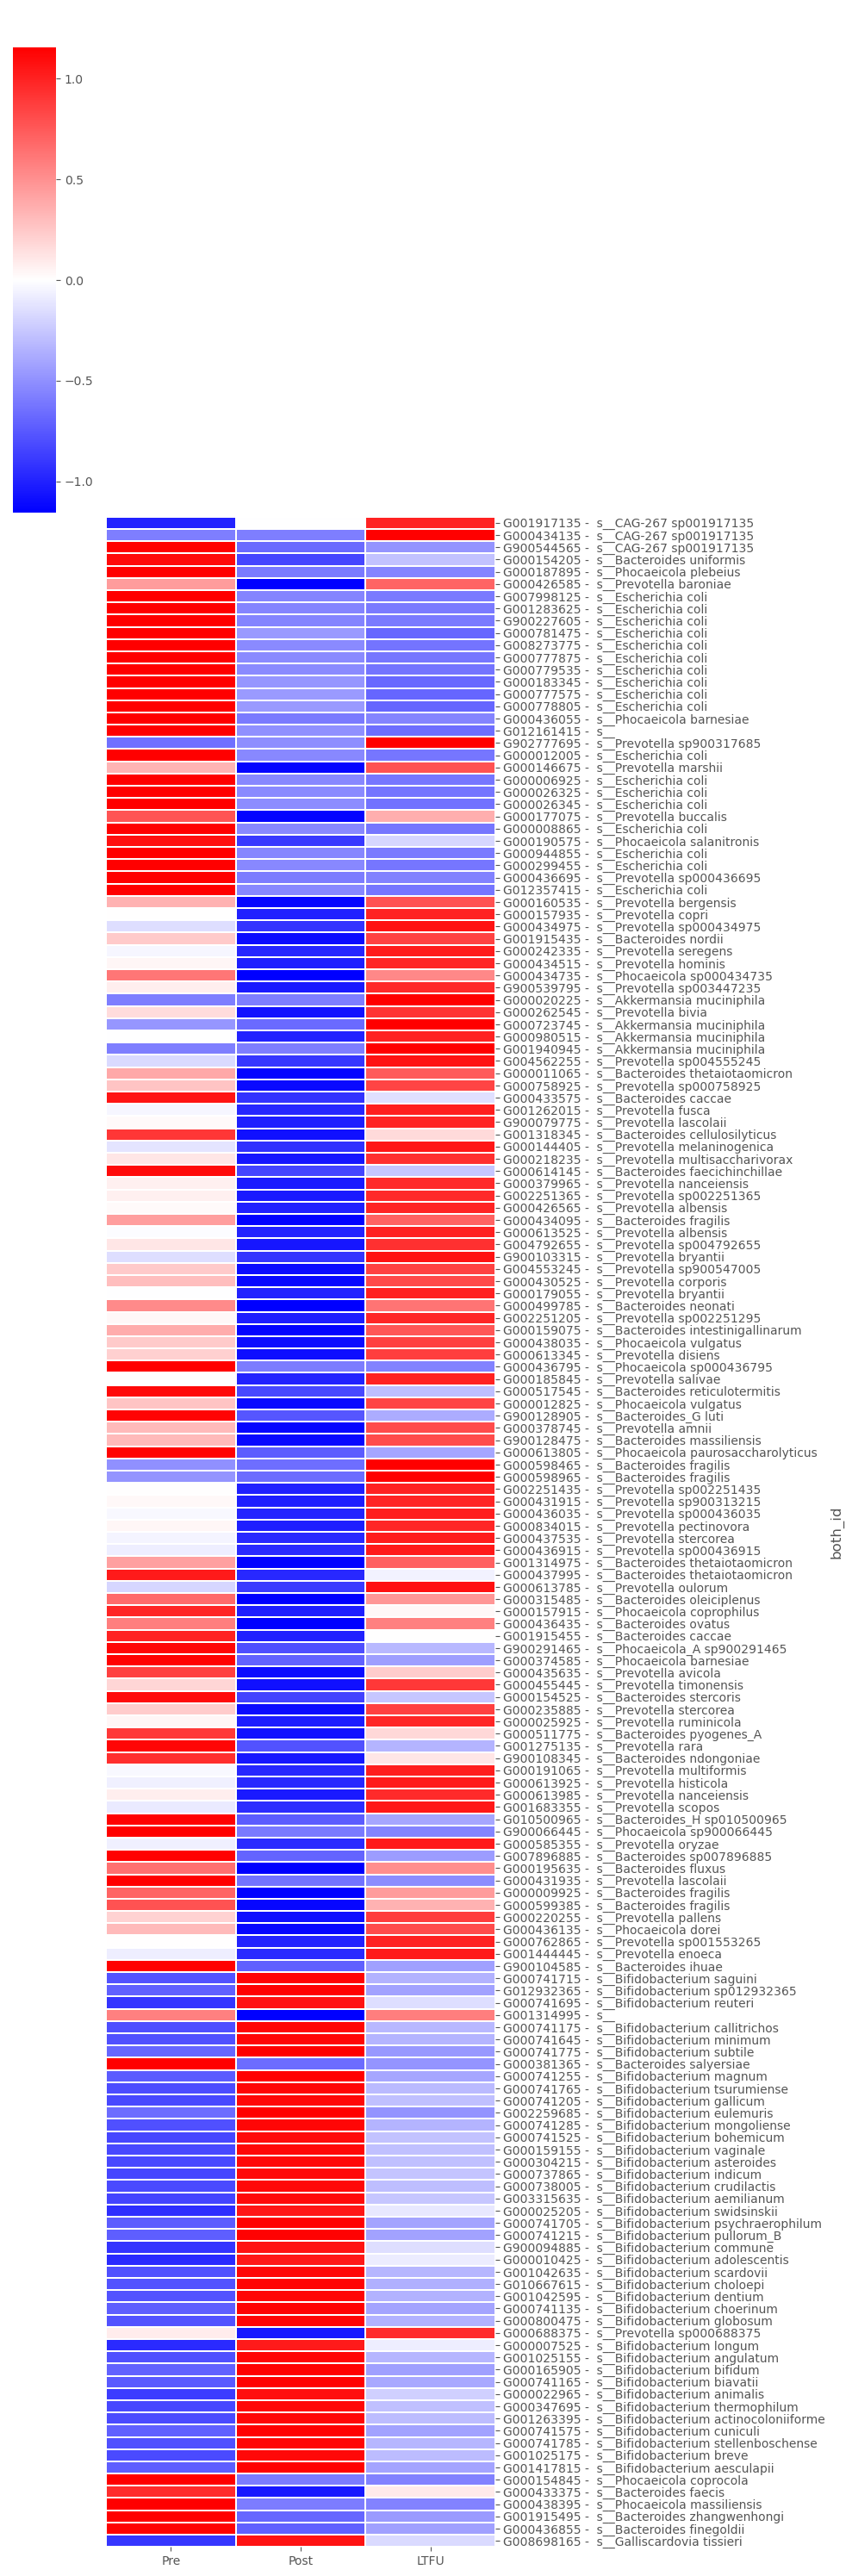

In [100]:
sns.clustermap(TB_keymicro2, z_score=0, cmap="bwr",
               linewidths=0.3, row_cluster=False, col_cluster=False, yticklabels=1, figsize=(10, 30))
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/keymicro_zscore_clustermap_TB-allorder.svg', dpi=300, bbox_inches="tight")

# All 3
### Metagenomics - per genome, per gene; Metabolomics

In [8]:
!qiime gemelli joint-rpca \
    --i-tables ../data/Microbiome/pool_filtered_pergenome/RPCA/gemelli_filtered.qza ../data/Metabolomics/animal/RPCA/gemelli_filt_qiita-renamed.qza ../data/Microbiome/pool_filtered_other/gemelli_filtered_otherft.qza \
    --m-sample-metadata-file ../data/Microbiome/14577_fixed.txt \
    --p-train-test-column  'train_test' \
    --p-max-iterations 15 \
    --p-min-feature-frequency 50 \
    --o-biplot ../data/Combined/MG-Mg-MB_joint_biplot.qza\
    --o-distance-matrix ../data/Combined/MG-Mg-MB_joint_distance_matrix.qza\
    --o-cross-validation-error ../data/Combined/MG-Mg-MB_cross_validation_error.qza

Saved PCoAResults % Properties('biplot') to: ../data/Combined/MG-Mg-MB_joint_biplot.qza
Saved DistanceMatrix to: ../data/Combined/MG-Mg-MB_joint_distance_matrix.qza
Saved SampleData[CrossValidationResults] to: ../data/Combined/MG-Mg-MB_cross_validation_error.qza


In [9]:
!qiime longitudinal volatility \
    --m-metadata-file ../data/Combined/MG-Mg-MB_cross_validation_error.qza \
    --p-state-column 'iteration' \
    --o-visualization ../data/Combined/MG-Mg-MB_cv-error_volatility_plot.qzv

Saved Visualization to: ../data/Combined/MG-Mg-MB_cv-error_volatility_plot.qzv


![image](../data/Combined/MG-Mg-MB_cv-error_volatility_plot.png)

In [14]:
!qiime emperor biplot \
    --i-biplot ../data/Combined/MG-Mg-MB_joint_biplot.qza \
    --m-sample-metadata-file ../data/Microbiome/14577_fixed.txt \
    --p-number-of-features 25 \
    --o-visualization ../data/Combined/MG-Mg-MB_emperor-biplot.qzv

Saved Visualization to: ../data/Combined/MG-Mg-MB_emperor-biplot.qzv


In [19]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Combined/MG-Mg-MB_joint_distance_matrix.qza \
    --m-metadata-file ../data/Microbiome/14577_fixed.txt \
    --m-metadata-column 'marmoset_id' \
    --p-pairwise True \
    --o-visualization ../data/Combined/MG-Mg-MB_permanova-marmid.qzv

Saved Visualization to: ../data/Combined/MG-Mg-MB_permanova-marmid.qzv


In [20]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Combined/MG-Mg-MB_joint_distance_matrix.qza \
    --m-metadata-file ../data/Microbiome/14577_fixed.txt \
    --m-metadata-column 'Pre_Post' \
    --o-visualization ../data/Combined/MG-Mg-MB_permanova-prepost.qzv
#not significantly different p=0.9

Saved Visualization to: ../data/Combined/MG-Mg-MB_permanova-prepost.qzv
